# CS3244 Group Project

# Preparation of the dataset:
## Steps Required:
  1. Import all the necessary Python libraries (numpy, pandas, matplotlib, seaborn).
  2. Import the Guns Incident CSV File from Google Drive.
  3. Observe the features and target of the Guns Incident Dataset.

In [ ]:
# Step 1: Importing all the relevant libraries for the Machine Learning Project

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
!pip install sklearn_evaluation
!pip install imbalanced-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.2/79.2 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.7/108.7 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 31.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.1/193.1 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 57.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.8/54.8 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 4.5 MB/s eta 0:00:00


In [ ]:
# Step 2: Importing the Guns Incident CSV File from Google Drive

# from google.colab import drive
# drive.mount('/content/drive')

# data = '/content/drive/MyDrive/CS3244 Gun Incidence/Guns incident Data.csv'
# df = pd.read_csv(data)

In [ ]:
df = pd.read_csv("Guns incident Data.csv")

In [ ]:
# Step 3: Observe the features and target of the Guns Incident Dataset

# Observing the shape of the dataset (number of rows and columns of dataset)
print(df.shape)

# Observing the first few rows of the dataset and its contents
df.head()

(100798, 12)


S.No.  Year  Month     Date   Reason     Education     Sex   Age  \
0      1  2017      1   6/1/17  Suicide     Bachelors    Male  35.0   
1      2  2017      1  19/1/17  Suicide  Some college  Female  22.0   
2      3  2017      1   1/1/17  Suicide     Bachelors    Male  61.0   
3      4  2017      2   6/2/17  Suicide     Bachelors    Male  65.0   
4      5  2017      2   9/2/17  Suicide   High School    Male  32.0   

                     Race  Hispanic Place of incident  Police involvement  
0  Asian/Pacific Islander       100              Home                   0  
1                   White       100            Street                   0  
2                   White       100   Other specified                   0  
3                   White       100              Home                   0  
4                   White       100   Other specified                   0

After printing the shape of the dataset, we observed that the dataset contains 100798 rows and 12 columns before the cleaning process. The 12 columns include S.No., Year, Month, Date, Reason, Education, Sex, Age, Race, Hispanic, Place of incident and Police involvement.

# Data Cleaning
  ## Steps Required
  1. Check that the data types of all the columns are correct.
  2. Dealing with missing/NA values present in the dataset.
  3. Check for any duplicates and remove them accordingly.
  4. Remove irrelevant features/columns from dataset that do not contribute to the outcome.

In [ ]:
# Step 1: Check if all the columns of dataset have the right datatype

df.dtypes.rename("Data Type").reset_index()

index Data Type
0                S.No.     int64
1                 Year     int64
2                Month     int64
3                 Date    object
4               Reason    object
5            Education    object
6                  Sex    object
7                  Age   float64
8                 Race    object
9             Hispanic     int64
10   Place of incident    object
11  Police involvement     int64

When the column data types of the dataset are observed, it seems that for the 'Date' column, the Data Type is 'object', which is not correct. We need to set the Data Type of the 'Date' column to a 'datetime' Data Type instead. For the remaining columns of the dataset, the datatypes are either correct or plausible.

In [ ]:
# Convert the 'Date' column to a 'datetime' Data Type

df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%y')
df.dtypes.rename("Data Type").reset_index()

index       Data Type
0                S.No.           int64
1                 Year           int64
2                Month           int64
3                 Date  datetime64[ns]
4               Reason          object
5            Education          object
6                  Sex          object
7                  Age         float64
8                 Race          object
9             Hispanic           int64
10   Place of incident          object
11  Police involvement           int64

In [ ]:
# Step 2: Dealing with missing/NA values in the dataset

df.isna().sum().rename("Number of NAs").reset_index()

index  Number of NAs
0                S.No.              0
1                 Year              0
2                Month              0
3                 Date              0
4               Reason              0
5            Education           1422
6                  Sex              0
7                  Age             18
8                 Race              0
9             Hispanic              0
10   Place of incident           1384
11  Police involvement              0

Upon calculating the total number of NA values for each column of the dataset, we observe that there are 1422 NAs for education, 18 NAs for Age and 1384 NAs for Place of incident. The rest of the columns do not have any NA values.

Replacing the NA values with the mode/mean/median might affect the accuracy and results of the Machine Learning algorithms implemented subsequently, hence imputation might not be a suitable option to replace the NA values. Additionally, we have more than 100000 rows of data, implying that we have sufficent data for training, validation and testing. Hence, the best approach is to simply remove the data rows containing NA values from the dataset.

In [ ]:
# Remove all the NA values from the dataset
df.dropna(inplace = True)

# Observe the modified shape of the dataset
print(df.shape)

(98015, 12)


The dataset now contains 98015 rows instead of the initial 100798 rows, suggesting that we have successfully removed all the rows containing NA values. There are 100798 - 98015 = 2783 rows that contain at least one NA value.

In [ ]:
# Step 3: Check for any duplicates in the dataset

# First, we need to remove the S.No. column as S.No. is unique for all data rows
df.drop(columns = ['S.No.'], inplace = True)

# Check the total number of duplicates in the dataset
number_duplicates = df.duplicated().sum()
print(f'No. of duplicate rows: {number_duplicates}')

No. of duplicate rows: 3096


We observed that there are 3096 duplicate rows in the dataset. highlighting that we need to remove these duplicate rows before analysis as duplicate entries will also affect the results of the Machine Learning Algorithm.

In [ ]:
# Drop the duplicates in the dataset
df.drop_duplicates(inplace = True)

# Observe the modified shape of the dataset
df.shape

(94919, 11)

After printing out the shape of the dataset, there are 94919 rows left. This shows that all the duplicated rows of the dataset are removed as well. 98015 - 94919 = 3096 duplicated rows are removed, which tallies with our initial observation.

In [ ]:
# Step 4: Removing all the irrelevent features/columns from the dataset

# Remove Year and Month columns as the same information is found in the Date column
df.drop(columns=['Year', 'Month'], inplace = True)

# Remove Hispanic column as it does not make any sense having random values
df.drop(columns=['Hispanic'], inplace = True)

For the irrelevent features/columns of the dataset, first we removed the Year and Month columns as the year and month information is already reflected in the Date column of the dataset, suggesting that the Year and Month columns are duplicates of the Date columns and should be removed. We also removed the Hispanic column as we do not know what the values of Hispanic (eg. 100, 701) are referring to and it does not make any sense for Hispanic to have a certain numerical value that is not boolean-related. To prevent confusion, we dropped the Hispanic column as well.

In [ ]:
# Printing the final cleaned dataset for checking

df.head(n = 10)

Date        Reason              Education     Sex   Age  \
0  2017-01-06       Suicide              Bachelors    Male  35.0   
1  2017-01-19       Suicide           Some college  Female  22.0   
2  2017-01-01       Suicide              Bachelors    Male  61.0   
3  2017-02-06       Suicide              Bachelors    Male  65.0   
4  2017-02-09       Suicide            High School    Male  32.0   
5  2017-02-26       Suicide  Less than High School    Male  18.0   
6  2017-02-21  Undetermined            High School    Male  49.0   
7  2017-03-18       Suicide            High School    Male  42.0   
8  2017-02-13    Accidental           Some college    Male  51.0   
10 2017-02-03       Suicide           Some college    Male  31.0   

                              Race Place of incident  Police involvement  
0           Asian/Pacific Islander              Home                   0  
1                            White            Street                   0  
2                            White   Other specified                   0  
3                            White              Home                   0  
4                            White   Other specified                   0  
5   Native American/Native Alaskan              Home                   0  
6                            White              Home                   0  
7   Native American/Native Alaskan              Home                   0  
8                            White   Other specified                   0  
10                           White              Home                   0

# Visualising The Dataset Features And Outcome (Explanatory Data Analysis)
  Used matplotlib and seaborn libraries to visualise the dataset features and outcome through diagrams such as bar charts.

## Diagram 1: Visualising the distribution of the target variable, 'Reason'.

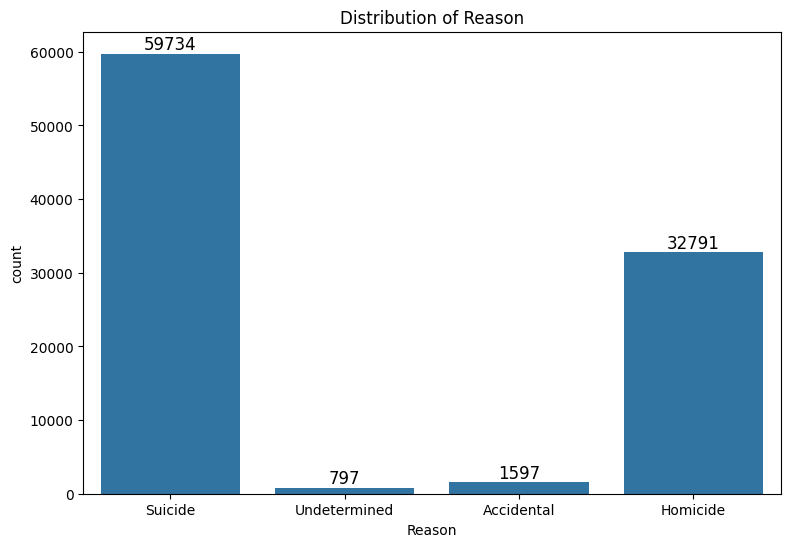

In [ ]:
# Analysing the distribution of the target variable, 'Reason', using a bar chart.
plt.figure(figsize=(9, 6))
ax = sns.countplot(x='Reason', data=df)
plt.title('Distribution of Reason')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, color='black')
plt.show()

From the bar chart plotted, we observe that Suicide and Homicide contribute to a large proportion of deaths (around 60000 for Suicide and more than 30000 for Homicide). However, Undetermined and Accidental contribute to very few cases of death (less than 2000 each for both categories). Hence, we combined Undertermined and Accidental categories into a broader category called Others.

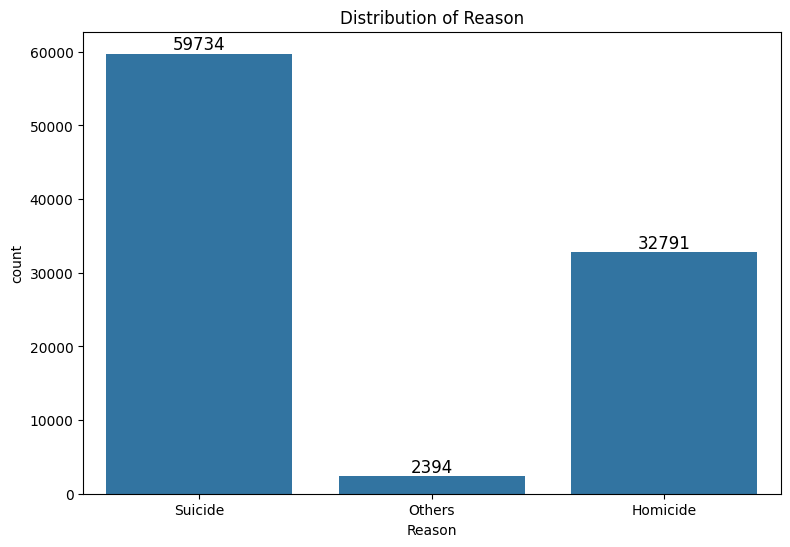

In [ ]:
# Combining Undetermined and Accidental categories into Others
df['Reason'] = df['Reason'].replace(['Accidental', 'Undetermined'], 'Others')

# Plot the new resultant diagram after the new classification
plt.figure(figsize=(9, 6))
bx=sns.countplot(x ='Reason', data = df)
plt.title('Distribution of Reason')
for p in bx.patches:
    bx.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, color='black')
plt.show()

## Diagram 2: Visualising the distribution of the feature 'Place of incident'.

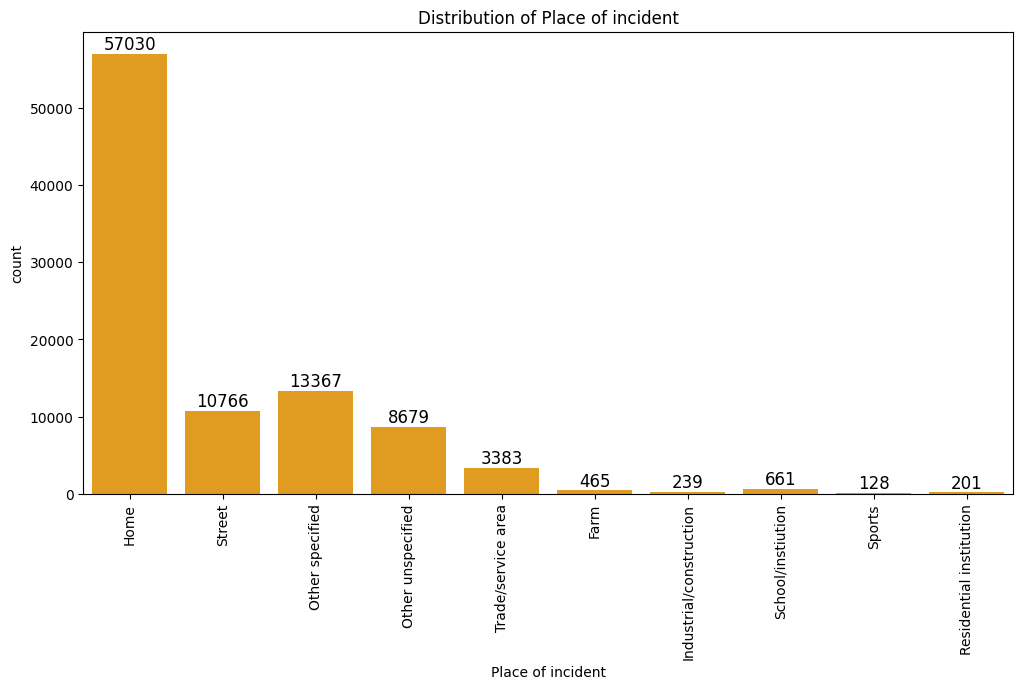

In [ ]:
# Analysing the distribution of the categorical variable, 'Place of incident', using a bar chart.
plt.figure(figsize=(12, 6))
cx=sns.countplot(x = 'Place of incident', data = df, color = 'orange')
plt.title('Distribution of Place of incident')
plt.xticks(rotation = 90)
for p in cx.patches:
    cx.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, color='black')
plt.show()

From the bar chart plotted, the known places of incident mostly come from Home and Street. We will classify 'Other specified' and 'Other unspecified' into a category called 'Other Places'. The rest of the categories, including 'Trade/service area', 'Farm', 'Industrial/construction', 'School/institution' and 'Sports', contain few observations and for simplicity, we classify these categories as 'Miscellaneous'.

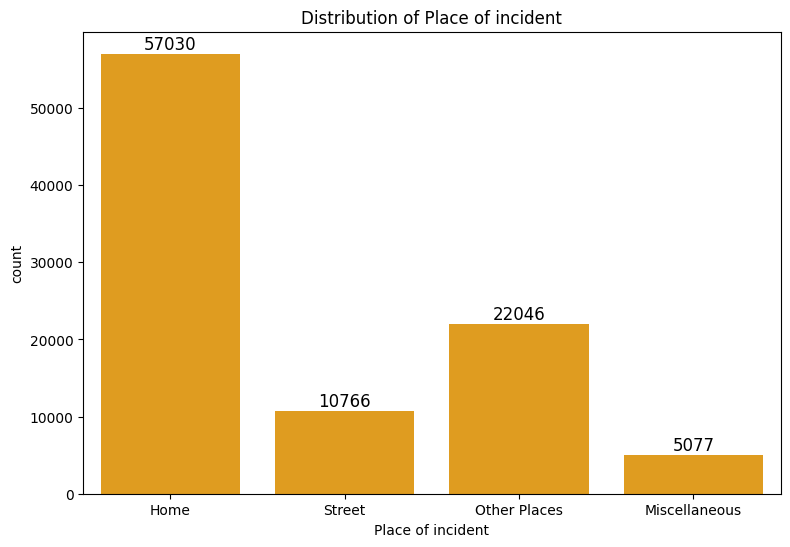

In [ ]:
# Combining 'Other specified' and 'Other unspecified' into the column 'Other Places'.
df['Place of incident'] = df['Place of incident'].replace(['Other specified', 'Other unspecified'], 'Other Places')

# Combining 'Trade/service area', 'Farm', 'Industrial/construction', 'School/institution' and 'Sports' into the column 'Miscellaneous'.
df['Place of incident'] = df['Place of incident'].replace(['Trade/service area', 'Farm', 'Industrial/construction', 'School/instiution', 'Sports', 'Residential institution'], 'Miscellaneous')

# Plot the new resultant diagram after the new classification
plt.figure(figsize=(9, 6))
ax=sns.countplot(x = 'Place of incident', data = df, color = 'orange')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, color='black')
plt.title('Distribution of Place of incident')
plt.show()

## Diagram 3: Visualising the distribution of the feature 'Age'.


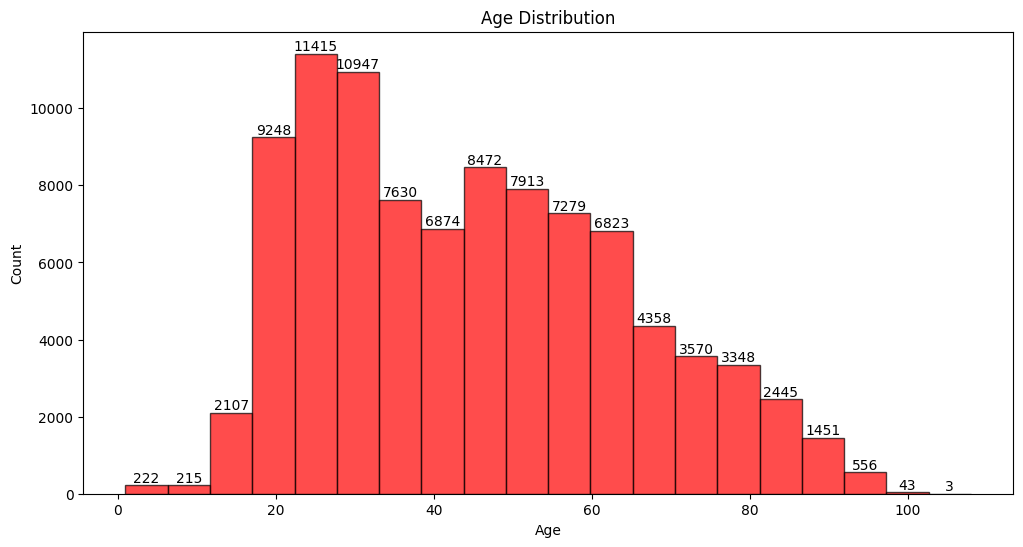

In [ ]:
# Analysing the distribution of the numerical variable 'Age' using a histogram
plt.figure(figsize=(12, 6))
counts, bins, patches = plt.hist(df['Age'], bins=20, color='red', edgecolor='black', alpha=0.7)
for count, bin_edge, patch in zip(counts, bins, patches):
    bar_center = patch.get_x() + patch.get_width() / 2
    plt.text(bar_center, count + 2,
             f'{int(count)}',
             ha='center', va='bottom',
             fontsize=10, color='black')

plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


From the histogram, we observe that the age ranges from a very small number (close to 0) to a very large number (around 100). Most people have the age range of between 20 and 60. We do not observe any significant skew (left skew/right skew) in the age range.

## Diagram 4: Visualising the distribution of the outcome 'Reason' with respect to the feature 'Place of incident'.

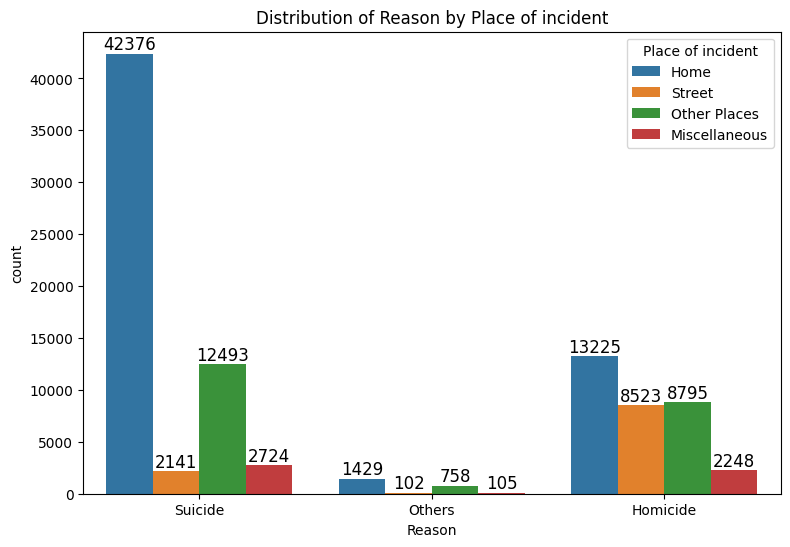

In [ ]:
# Analysing the distribution of the outcome 'Reason' by the feature 'Place of incident' using a countplot
plt.figure(figsize=(9, 6))
ax = sns.countplot(x='Reason', hue='Place of incident', data=df)
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=12, color='black')
plt.title('Distribution of Reason by Place of incident')
plt.show()


**Key Observations:**

From the countplot diagram, we observed that for all the three reasons - `Suicide`, `Others` and `Homicide`, the place of incident `Home` contributes the most. Furthermore, the place of incident `Other Places` contributes the second most for all three reasons as well. For the reason `Others`, `Street` and `Miscellaneous` have near zero cases.

## Diagram 5: Visualising the distribution of the outcome 'Reason' with respect to the feature 'Race'.

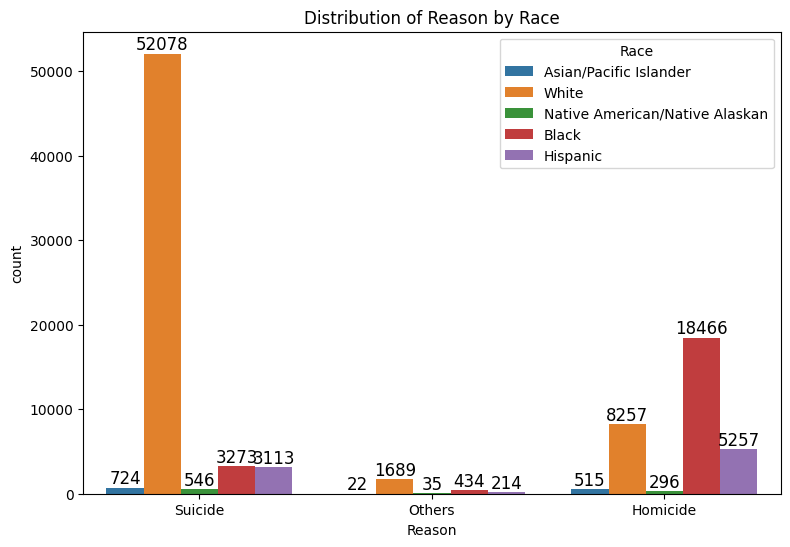

In [ ]:
# Analysing the distribution of the outcome 'Reason' by the feature 'Race' using a countplot
plt.figure(figsize=(9, 6))
ax = sns.countplot(x='Reason', hue='Race', data=df)
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=12, color='black')
plt.title('Distribution of Reason by Race')

plt.show()

**Key Observations:**

Through the countplot, we observed that for the reason `Suicide` and `Others`, `White` race contributes the most while for the reason `Homicide`, `Black` race contributes the most. Also, races `Asian/Pacific Islander` and `Native American/Native Alaskan` contribute insignificantly to all the three reasons.

## Diagram 6: Visualising the distribution of the outcome 'Reason' with respect to the feature 'Education'.

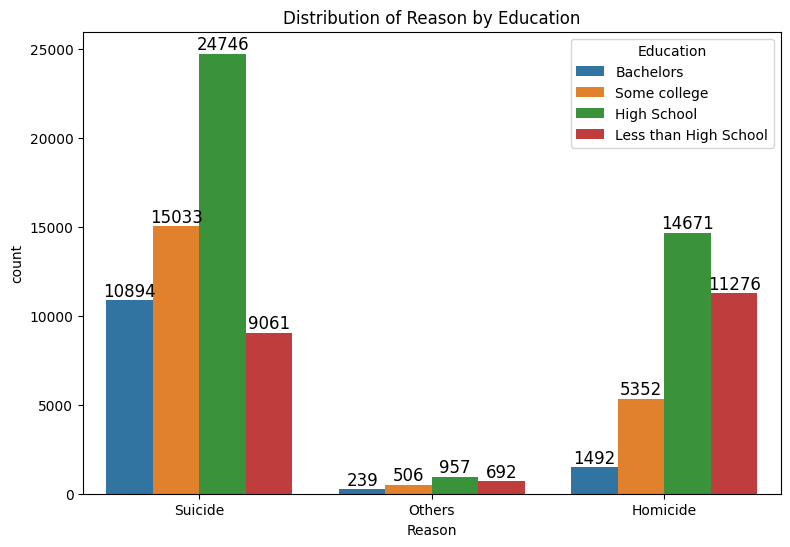

In [ ]:
# Analysing the distribution of the outcome 'Reason' by the feature 'Education' through a countplot
plt.figure(figsize=(9, 6))
ax = sns.countplot(x='Reason', hue='Education', data=df)
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=12, color='black')
plt.title('Distribution of Reason by Education')
plt.show()

**Key Observations:**

Analysing the countplot diagram, we observed that for all three reasons - `Suicide`, `Others` and `Homicide`, `High School` contributes the most. `Some college` contributes more to `Suicide` while `Less than High School` contributes more to `Others` and `Homicide`. `Bachelors` contributes significantly less to the `Others` and `Homicide`.

# Implementing the Logistic Regression Model


We previously employed and explored the predictive power of the Decision Tree. An alternative method to predicting the Reasons, $Y$, of gun incidences would be to use the Logistic Regression Model.

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import multilabel_confusion_matrix
from scipy.stats import uniform
from sklearn_evaluation import plot
from sklearn.metrics import classification_report

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
import time
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV

from imblearn.under_sampling import RandomUnderSampler

##Step 1: Data Preprocessing

###Step 1.1 Feature selection and feature encoding


Logistic regression models cannot directly handle datetime values as these are not numeric data types. As such, we decided to split the Date column into two numeric features (Year and Month).

Furthermore, research has shown that deaths from certain causes are more frequent on specific days of the week (Australian Institute of Health and Welfare, 2002). Additionally, over a million suicide attempts in the U.S. revealed that Sunday and Monday were peak days for these incidents (Whitehead, 2014). Similarly, Austrian studies found a correlation between specific days and suicide rates (Plöderl, 2021).

Based on these findings, we decided to transform the "Day" variable into "DayOfWeek" in our dataset. This allows us to explore whether specific types of deaths, such as suicides or homicides, exhibit similar patterns across different days, potentially leading to actionable insights and preventive strategies.

In [ ]:
# Extract year, month, and day from the Date column
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['DayOfWeek'] = df['Date'].dt.dayofweek

We then dropped the original Date column as well as the Reason column (our target variable) to create X.

Since there were also non-numeric features (including Education, Sex, Race, Place of incident), they have to be converted. We decided to use One-Hot Encoding to convert categorical data into numeric form.

In [ ]:
# Drop the Date and Reason columns to create X
X = df.drop(columns=['Date', 'Reason'])

# One-hot encode categorical features
X = pd.get_dummies(X, drop_first=True)

print(X.dtypes)
X.head()

Age                                    float64
Police involvement                       int64
Year                                     int32
Month                                    int32
DayOfWeek                                int32
Education_High School                     bool
Education_Less than High School           bool
Education_Some college                    bool
Sex_Male                                  bool
Race_Black                                bool
Race_Hispanic                             bool
Race_Native American/Native Alaskan       bool
Race_White                                bool
Place of incident_Miscellaneous           bool
Place of incident_Other Places            bool
Place of incident_Street                  bool
dtype: object


Age  Police involvement  Year  Month  DayOfWeek  Education_High School  \
0  35.0                   0  2017      1          4                  False   
1  22.0                   0  2017      1          3                  False   
2  61.0                   0  2017      1          6                  False   
3  65.0                   0  2017      2          0                  False   
4  32.0                   0  2017      2          3                   True   

   Education_Less than High School  Education_Some college  Sex_Male  \
0                            False                   False      True   
1                            False                    True     False   
2                            False                   False      True   
3                            False                   False      True   
4                            False                   False      True   

   Race_Black  Race_Hispanic  Race_Native American/Native Alaskan  Race_White  \
0       False          False                                False       False   
1       False          False                                False        True   
2       False          False                                False        True   
3       False          False                                False        True   
4       False          False                                False        True   

   Place of incident_Miscellaneous  Place of incident_Other Places  \
0                            False                           False   
1                            False                           False   
2                            False                            True   
3                            False                           False   
4                            False                            True   

   Place of incident_Street  
0                     False  
1                      True  
2                     False  
3                     False  
4                     False

We will convert the categorical values in our target output column ("Reason") into numerical values using label encoding.

In [ ]:
# Encode target variable (Reason) as integers
label_encoder_reason = LabelEncoder()
y = label_encoder_reason.fit_transform(df['Reason'])

The following shows what each number in y corresponds to in terms of the original "Reason" categories.

In [ ]:
label_mapping = dict(enumerate(label_encoder_reason.classes_))

print(label_mapping)

{0: 'Homicide', 1: 'Others', 2: 'Suicide'}


### Step 1.2: Performing the train-test-split on the dataset

We then partition the dataset into the training (80%) and testing (20%) datasets.

In [ ]:
# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Step 1.3: Feature Scaling

To improve convergence speed and model performance, we decided to standardize the numerical features using standard scaling. This process ensures that all numerical features have a mean of 0 and a standard deviation of 1, which could help the model to converge more efficiently and perform better.

In [ ]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Step 2: Surveying Models


### Step 2.1: Related Works


Rajadevi et al. (2020) discuss the use of multinomial logistic regression for handling classification problems where the dependent variable has more than two categories. This approach extends binomial logistic regression to cater for nominal variables that include more than two possible outcomes. By identifying relationships between independent variables and these multiple categories, multinomial logistic regression is well-suited for datasets containing several categorical outcomes. The authors note that while multinomial logistic regression is an effective tool for multi-class classification tasks, it comes with higher time complexity compared to simpler models. This could be a consideration when applying it to large datasets or real-time prediction tasks.


In addition, Alsubayhin et al. (2024) explored multiple machine learning models for crime prediction, providing important insights into the challenges associated with imbalanced class distribution in crime datasets. To address the issue of imbalanced data, they recommend several sampling techniques and model adjustments that were also taught during lectures. Oversampling the minority class or undersampling the majority class are common approaches to balance the class distribution. Another advanced technique they mention is SMOTE (Synthetic Minority Over-sampling Technique), which generates synthetic data points for the minority class. These techniques ensure that the model learns from a more balanced dataset, reducing the bias towards the majority class and enhancing the model’s ability to generalise across both prevalent and rare crime types.


### Step 2.2: Surveying Possible Logistic Regression Models

In [ ]:
# Get value counts for 'Reason'
reason_counts = df.value_counts('Reason')

# Convert the resulting Series into a DataFrame and reset the index
reason_counts_df = reason_counts.reset_index()

# Rename the columns for clarity
reason_counts_df.columns = ['Reason', 'Count']

# Print the DataFrame
reason_counts_df

Reason  Count
0   Suicide  59734
1  Homicide  32791
2    Others   2394

Since our target variable has more than two categories (shown in the table below), which makes it inherently non-binary, a single binary regression model will not be feasible. Instead, we can employ 2 different logistic models that are suitable for Multiclass classification:
<ul>
<li>One-vs-Rest Method</li>
<li>Multinomial Method</li>
</ul>


## Step 3: Implementing a Binary Logistic Regression Model

One of the fundamental forms of the logistic regression model is the _binary_ logistic regression model. Which is capable of predicting only 2 classes of features. To tackle this, we employ a combination of binary logistic regression models using the One-vs-Rest Method.

We first have to represent the features differently, where one class is taken as positive while the rest of the classes are treated as negative.

As shown in Diagram 1 (Distribution of target variable, "Reason"), we can change the feature's categorization from 3 classes (Homicide, Suicide, Others) to different sets of 2 classes (Homicide, Not Homicide), (Suicide, Not Suicide), and (Others, Not Others). Each of these pairs can be modelled separately using the OVR approach. We then find the <i>Reason</i> that is most probable across these models

In Step 1.1, we applied one-hot encoding to the categorical feature, allowing the model to handle it effectively. The target variable was label-encoded to convert the categorical labels into numerical values, enabling the use of logistic regression for multiclass classification.

###Step 3.1: Running the Basic Logistic Regression Model (Baseline)

In [ ]:
# Create Logistic Regression model without specifying the solver
lr_basic_model_ovr = LogisticRegression(max_iter=1000, multi_class='ovr')

# Fit the model directly with the training data
lr_basic_model_ovr.fit(X_train_scaled, y_train)

y_pred_lr_basic_ovr = lr_basic_model_ovr.predict(X_test_scaled)

# Calculate accuracy
print("Accuracy score:",accuracy_score(y_test, y_pred_lr_basic_ovr))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy score: 0.8270648967551623


The basic OVR logistic regression model gives us an accuracy of 0.82706 (5 d.p).

We will now perform cross-validation through GridSearchCV to improve this.

###Step 3.2: Running the One-vs-Rest Model (with GridSearchCV)



We decided to use Grid Search to find the best hyperparameters for our model. This involves testing a specified set of hyperparameters to determine the optimal combination that yields the best performance in accuracy and time

In [ ]:
# Logistic Regression
startTime_ovr1 = time.time()
model_ovr = LogisticRegression(max_iter=1000)

Parameters Used for the Model are as follows:

<table>
<thead>
<td>Parameter</td>
<td>Value
<td>Description</td>
</thead>
<tr>
<td><code>multi-class</code></td>
<td><code>ovr</code></td>
<td>Used to specify a method on handling multiple classes in the dataset. <br/>(As mentioned above, a logistic regression handles binary classes,<br/> making this parameter essential in developing our model).
</tr>
<tr><td rowspan=3><code>solver</code></td>
<td><code>lbfgs</code></td>
<td>* Solvers refer to the optimisation method to tune the parameters for <br/> the logistic regression model. lfgbs is a popular solver in context of </br>logistic regression models.</td></tr>
<tr><td><code>sag</code></td>
<td rowspan=2>Both sag and saga solvers are similar as they are built upon the <br/> Stochastic Gradient Descent method introduced in lecture 5. One of <br/> the primary difference is that saga has variance-reduction. </td></tr>
<tr><td><code>saga</code></td>
<tr><td><code>C</code></td>
<td><code>0.0001</code> to <code>10</code></td>
<td>C controls the regularisation strength, allowing for the model to be more generalised.</td></tr>
</table>

In [ ]:
# Define Param Grid
param_grid = {
    'C': [0.0001, 0.001, 0.01, 0.1, 1, 5, 10],  # Inverse of regularization strength at constant intervals
    'multi_class': ['ovr'],
    'solver': ['lbfgs', 'sag', 'saga'],  # Trying different solvers
}

# GridSearchCV
grid_search_ovr = GridSearchCV(model_ovr, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Set Up Time
setupTime_ovr1 = time.time()

# Fit the model with Grid Search
grid_search_ovr.fit(X_train_scaled, y_train)

# End Time
endTime_ovr1 = time.time()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_C', 'param_multi_class', 'param_solver', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')


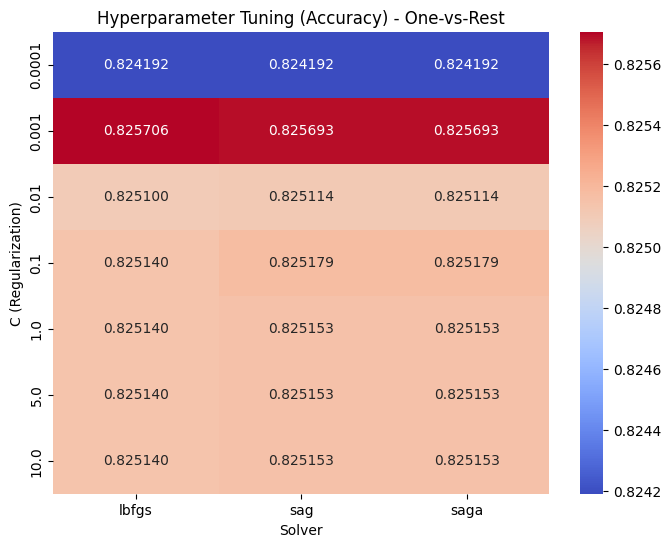

In [ ]:
# Extract results into a DataFrame
results_ovr1 = pd.DataFrame(grid_search_ovr.cv_results_)

# Display the columns to identify relevant metrics
print(results_ovr1.columns)

pivot_table_ovr1 = results_ovr1.pivot(index='param_C', columns='param_solver', values='mean_test_score')

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table_ovr1, annot=True, cmap='coolwarm', fmt='.6f')
plt.title('Hyperparameter Tuning (Accuracy) - One-vs-Rest')
plt.xlabel('Solver')
plt.ylabel('C (Regularization)')
plt.show()

The heatmap above shows the different accuracies that we get when training the model with corresponding parameters, C and solvers - cells in red indicate the highest accuracies. The code below corresponds to the best parameters in the heat map



In [ ]:
# Get the best parameters and score
print("Best Parameters: ", grid_search_ovr.best_params_)
print("Best Cross-validation Score: ", grid_search_ovr.best_score_)

Best Parameters:  {'C': 0.001, 'multi_class': 'ovr', 'solver': 'lbfgs'}
Best Cross-validation Score:  0.8257061960887603


As such, we will use the best parameters (C = 0.001 and the 'lbfgs' solver) as given from the Grid Search to make the best OVR model.

###Step 3.3: Identifying Accuracy Score (with GridSeachCV)

In [ ]:
lr_model_ovr = grid_search_ovr.best_estimator_

# pred Start Time
predStartTime_ovr1 = time.time()

y_pred_ovr = lr_model_ovr.predict(X_test_scaled)

# pred End Time
predEndTime_ovr1 = time.time()

# Calculate accuracy
print("Accuracy score:",accuracy_score(y_test, y_pred_ovr))

Accuracy score: 0.827275600505689


###Step 3.4: Running the One-vs-Rest Model (with RandomizedSearchCV)


We will now use RandomizedSearchCV instead of GridSearchCV.

RandomizedSearchCV samples a fixed number of parameter combinations from the specified distribution of hyperparameters, which allows for a more efficient exploration of the search space. This randomness can lead to discovering good hyperparameter configurations faster than exhaustive searching, particularly when dealing with many hyperparameters or when the evaluation of each configuration is costly.

Although GridSearchCV guarantees finding the best combination within the grid, RandomizedSearchCV provides a good trade-off between performance and computation time, making it suitable for scenarios where time or computational resources are limited.

In [ ]:
startTime_ovr2 = time.time()
model_ovr = LogisticRegression(max_iter=1000)

In [ ]:
# Define the refined parameter distribution for RandomizedSearchCV
param_distributions = {
    'C': uniform(0.0001, 1),  # Controlled C values up to 3 decimal places
    'multi_class': ['ovr'],        # One-vs-Rest strategy
    'solver': ['lbfgs', 'sag', 'saga'],  # Trying different solvers
}

# RandomizedSearchCV
random_search_ovr = RandomizedSearchCV(model_ovr, param_distributions,
                                       n_iter=20, cv=5, scoring='accuracy',
                                       n_jobs=-1, random_state=42)

# Set Up Time
setupTime_ovr2 = time.time()

# Fit the model with Randomized Search
random_search_ovr.fit(X_train_scaled, y_train)

# End Time
endTime_ovr2 = time.time()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_C', 'param_multi_class', 'param_solver', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')


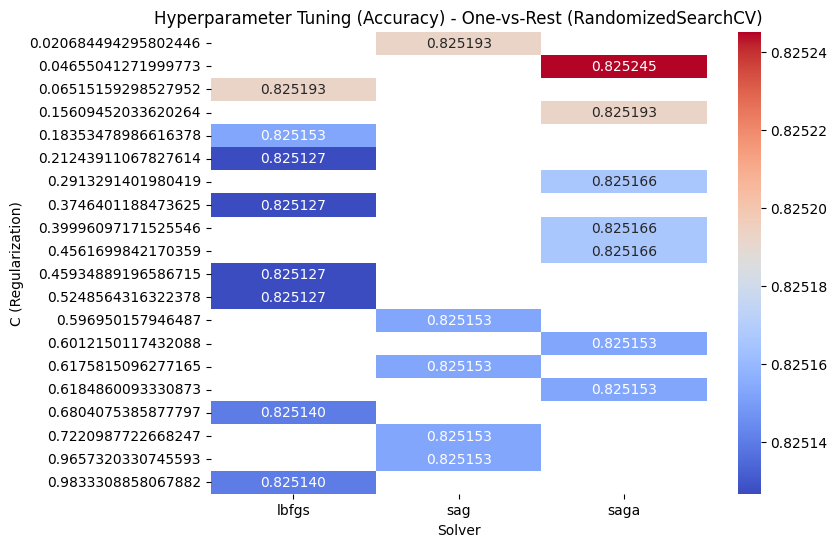

In [ ]:
# Extract results into a DataFrame
results_ovr2 = pd.DataFrame(random_search_ovr.cv_results_)

# Display the columns to identify relevant metrics
print(results_ovr2.columns)

pivot_table_ovr2 = results_ovr2.pivot(index='param_C', columns='param_solver', values='mean_test_score')

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table_ovr2, annot=True, cmap='coolwarm', fmt='.6f')
plt.title('Hyperparameter Tuning (Accuracy) - One-vs-Rest (RandomizedSearchCV)')
plt.xlabel('Solver')
plt.ylabel('C (Regularization)')
plt.show()

The heatmap above shows the different accuracies that we get when training the model with different parameters.

In [ ]:
# Print the best parameters
print("Best parameters found:", random_search_ovr.best_params_)
print("Best accuracy score:", random_search_ovr.best_score_)

Best parameters found: {'C': 0.04655041271999773, 'multi_class': 'ovr', 'solver': 'saga'}
Best accuracy score: 0.8252452755646276


As such, we will use the best parameters (C = 0.04655 and the 'saga' solver) as given from the Randomized Search to make the best OVR model.

###Step 3.5: Identifying Accuracy Score (with RandomizedSearchCV)

In [ ]:
lr_model_ovr2 = random_search_ovr.best_estimator_

# pred Start Time
predStartTime_ovr2 = time.time()

y_pred_ovr2 = lr_model_ovr2.predict(X_test_scaled)

# pred End Time
predEndTime_ovr2 = time.time()

# Calculate accuracy
print("Accuracy score:",accuracy_score(y_test, y_pred_ovr2))

Accuracy score: 0.827117572692794


## Step 4: Implementing a Multinomial Logistic Regression Model


An alternative to the OVR method is the Multinomial Logistic Regression Model.

While the OVR method creates separate binary classifiers for each class, multinomial logistic regression leverages the softmax function to provide a single model that can predict the probabilities of all classes simultaneously. Consequently, this model does not require the target variable to be binary, making it suitable for multiclass classification tasks.

In our process, we aim to improve the performance of the multinomial logistic regression model by tuning its hyperparameters. Specifically, we focus on optimising the regularisation strength (C), which controls overfitting, and the solver method used to minimize the loss function. By fine-tuning these parameters through methods like GridSearchCV and RandomizedSearchCV, we can identify the best configuration that maximizes accuracy across multiple classes.

###Step 4.1: Running the Basic Multinomial Model (Baseline)

In [ ]:
# Create Logistic Regression model without specifying the solver
lr_basic_model = LogisticRegression(max_iter=1000, multi_class='multinomial')

# Fit the model directly with the training data
lr_basic_model.fit(X_train_scaled, y_train)

y_pred_lr_basic = lr_basic_model.predict(X_test_scaled)

# Calculate accuracy
print("Accuracy score:",accuracy_score(y_test, y_pred_lr_basic))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy score: 0.827117572692794


The basic multinomial logistic regression model gives us an accuracy of 0.82712 (5 d.p).

We will now perform cross-validation through GridSearchCV to improve this.

###Step 4.2: Running the Multinomial Model (with GridSearchCV)

In [ ]:
# Start Time
startTime_mult1 = time.time()
model = LogisticRegression(max_iter=1000)

Parameters Used for the Model are as follows:

<table>
<thead>
<td>Parameter</td>
<td>Value
<td>Description</td>
</thead>
<tr>
<td><code>multi-class</code></td>
<td><code>multinomial</code></td>
<td>Uses a single model to handle all classes simultaneously. The model <br/>applies the softmax function to predict the probability distribution over <br/>all classes, and the cross-entropy loss is minimised during training.<br/> This is a true multiclass approach.
</tr>
<tr><td rowspan=3><code>solver</code></td>
<td><code>lbfgs</code></td>
<td>* Solvers refer to the optimisation method to tune the parameters for <br/> the logistic regression model. lfgbs is a popular solver in context of </br>logistic regression models.</td></tr>
<tr><td><code>sag</code></td>
<td rowspan=2>Both sag and saga solvers are similar as they are built upon the <br/> Stochastic Gradient Descent method introduced in lecture 5. One of <br/> the primary difference is that saga has variance-reduction. </td></tr>
<tr><td><code>saga</code></td>
<tr><td><code>C</code></td>
<td><code>0.0001</code> to <code>10</code></td>
<td>C controls the regularisation strength, allowing for the model to be more generalised.</td></tr>
</table>

In [ ]:
# Define the hyperparameter distributions
param_grid = {
    'C': [0.0001, 0.001, 0.01, 0.1, 1, 5, 10], # Inverse of regularization strength
    'multi_class': ['multinomial'],
    'solver': ['lbfgs', 'sag', 'saga'], # Trying different solvers
}

# Set up GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Set Up Time
setupTime_mult1 = time.time()

# Fit the model with Grid Search
grid_search.fit(X_train_scaled, y_train)

# End Time
endTime_mult1 = time.time()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


The heatmap below illustrates the various accuracies achieved when training the model with different parameters.


Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_C', 'param_multi_class', 'param_solver', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')


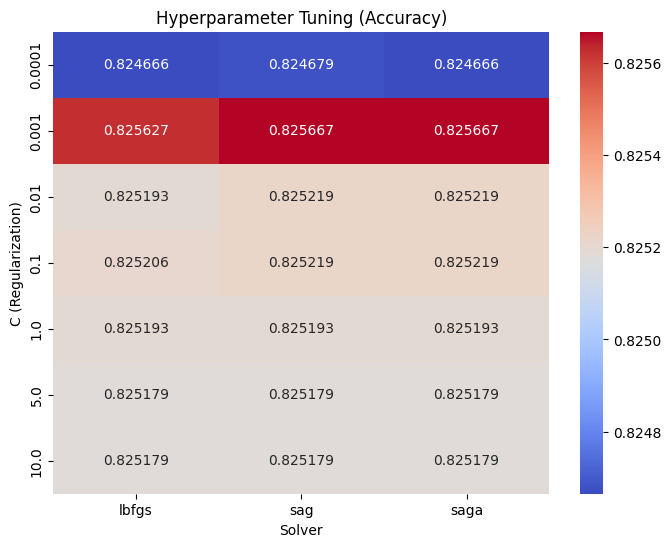

In [ ]:
# Extract results into a DataFrame
results_multi = pd.DataFrame(grid_search.cv_results_)

# Display the columns to identify relevant metrics
print(results_multi.columns)

pivot_table = results_multi.pivot(index='param_C', columns='param_solver', values='mean_test_score')

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt='.6f')
plt.title('Hyperparameter Tuning (Accuracy)')
plt.xlabel('Solver')
plt.ylabel('C (Regularization)')
plt.show()

The heatmap above shows the different accuracies that we get when training the model with different parameters.

In [ ]:
# Get the best parameters and score
print("Best Parameters with GridSearchCV: ", grid_search.best_params_)
print("Best Cross-validation Score: ", grid_search.best_score_)

Best Parameters with GridSearchCV:  {'C': 0.001, 'multi_class': 'multinomial', 'solver': 'sag'}
Best Cross-validation Score:  0.8256666886152632


As such, we will use the best parameters (C = 0.001 and the 'sag' solver) as given from the Grid Search to make the best multinomial logistic regression model.

###Step 4.3: Identifying Accuracy (with GridSearchCV)


In [ ]:
lr_model_mult1 = grid_search.best_estimator_

# pred Start Time
predStartTime_lr1 = time.time()

y_pred_lr_gs = lr_model_mult1.predict(X_test_scaled)

# pred End Time
predEndTime_lr1 = time.time()

# Calculate accuracy
print("Accuracy score:",accuracy_score(y_test, y_pred_lr_gs))

Accuracy score: 0.8269068689422672


###Step 4.4: Running the Multinomial Model (with RandomizedSearchCV)

Once again, we will now use RandomizedSearchCV instead of GridSearchCV.

In [ ]:
# Start Time
startTime_mult2 = time.time()
model = LogisticRegression(max_iter=1000)

In [ ]:
# Define the refined parameter distribution with predefined C values to reduce clutter
param_distributions = {
    'C': uniform(0.001, 10),  # Controlled C values up to 3 decimal places
    'multi_class': ['multinomial'],                # One-vs-Rest strategy
    'solver': ['lbfgs', 'sag', 'saga'],    # Trying different solvers
}

# Set up RandomizedSearchCV with fewer iterations for faster performance
random_search_mult2 = RandomizedSearchCV(model, param_distributions, n_iter=20, cv=5,
                                       scoring='accuracy', n_jobs=-1, random_state=42)

# Record setup time
setupTime_mult2 = time.time()

# Fit the model with Randomized Search
random_search_mult2.fit(X_train_scaled, y_train)

# End time
endTime_mult2 = time.time()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_C', 'param_multi_class', 'param_solver', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')


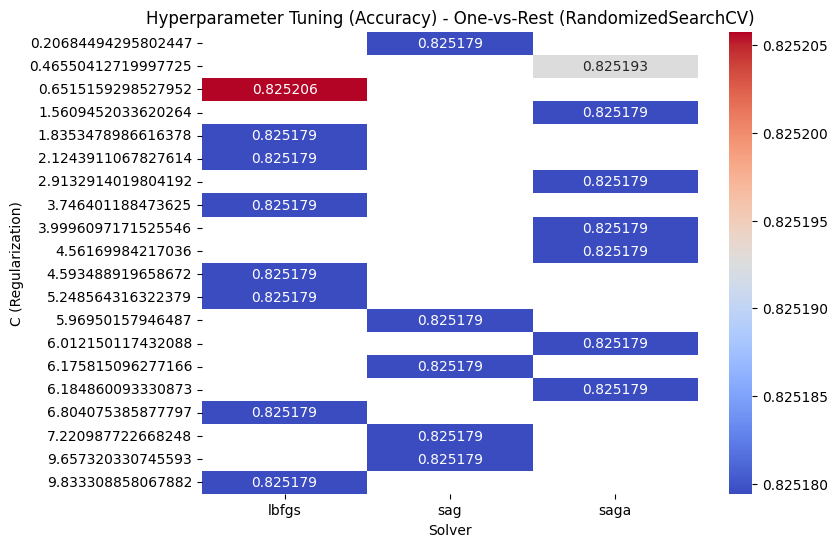

In [ ]:
# Extract results into a DataFrame
results_ovr2 = pd.DataFrame(random_search_mult2.cv_results_)

# Display the columns to identify relevant metrics
print(results_ovr2.columns)

pivot_table_ovr2 = results_ovr2.pivot(index='param_C', columns='param_solver', values='mean_test_score')

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table_ovr2, annot=True, cmap='coolwarm', fmt='.6f')
plt.title('Hyperparameter Tuning (Accuracy) - One-vs-Rest (RandomizedSearchCV)')
plt.xlabel('Solver')
plt.ylabel('C (Regularization)')
plt.show()

The heatmap above shows the different accuracies that we get when training the model with different parameters.

In [ ]:
# Get the best parameters and score
print("Best Parameters with RandomizedSearchCV: ", random_search_mult2.best_params_)
print("Best Cross-validation Score: ", random_search_mult2.best_score_)

Best Parameters with RandomizedSearchCV:  {'C': 0.6515159298527952, 'multi_class': 'multinomial', 'solver': 'lbfgs'}
Best Cross-validation Score:  0.8252057680911304


As such, we will use the best parameters (C = 0.65152 and the 'lbfgs' solver) as given from the Randomized Search to make the best multinomial logistic regression model.

###Step 4.5: Identifying Accuracy (with RandomisedSearchCV)

In [ ]:
lr_model_mult2 = random_search_mult2.best_estimator_

# pred Start Time
predStartTime_lr2 = time.time()

y_pred_lr_rs = lr_model_mult2.predict(X_test_scaled)

# pred End Time
predEndTime_lr2 = time.time()

# Calculate accuracy
print("Accuracy score:", accuracy_score(y_test, y_pred_lr_rs))

Accuracy score: 0.827117572692794


## Step 5: Evaluation of Models

To determine which is best, we will evaluate the models based on following criterias:

<ul>
<li>Time Analysis
<ul>
<li>Run-time of Setting up the Model (Set Up Time)</li>
<li>Run-time of Tuning the Parameters (Run Time)</li>
<li>Run-time of Training the Model & Predicting the Outcome $Y$ Based on Input Features $X$ (Prediction Time)</li>
</li></ul>
<li>Cross-Validation and Test Accuracy Scores</li>
<li>Using Micro-Average:</li>
<ul>
<li>Accuracy</li>
<li>Recall</li>
<li>Precision</li>
</ul>

### Step 5.1: Time Analysis


We will now the models based on the time it takes.

#### Step 5.1.1: One-vs-Rest Model (with GridSearchCV)

In [ ]:
#Overall Set Up Duration
overall_setupTime_ovr1 = setupTime_ovr1 - startTime_ovr1
print("Overall Set Up Time: ", overall_setupTime_ovr1)

#Overall Run Time
overall_runTime_ovr1 = endTime_ovr1 - startTime_ovr1
print("Overall Run Time: ", overall_runTime_ovr1)

#Overall Prediction Time
predTime_ovr1 = predEndTime_ovr1 - predStartTime_ovr1
print("Overall Prediction Time: ", predTime_ovr1)

Overall Set Up Time:  0.006330013275146484
Overall Run Time:  148.29383444786072
Overall Prediction Time:  0.00196075439453125


#### Step 5.1.2: One-vs-Rest Model (with RandomizedSearchCV)

In [ ]:
#Overall Set Up Duration
overall_setupTime_ovr2 = setupTime_ovr2 - startTime_ovr2
print("Overall Set Up Time: ", overall_setupTime_ovr2)

#Overall Run Time
overall_runTime_ovr2 = endTime_ovr2 - setupTime_ovr2
print("Overall Run Time: ", overall_runTime_ovr2)

#Overall Prediction Time
predTime_ovr2 = predEndTime_ovr2 - predStartTime_ovr2
print("Overall Prediction Time: ", predTime_ovr2)

Overall Set Up Time:  0.0059206485748291016
Overall Run Time:  180.67515468597412
Overall Prediction Time:  0.002069234848022461


#### Step 5.1.3: Multinomial Model (with GridSearchCV)

In [ ]:
#Overall Set Up Duration
overall_setupTime_mult1 = setupTime_mult1 - startTime_mult1
print("Overall Set Up Time: ", overall_setupTime_mult1)

#Overall Run Time
overall_runTime_mult1 = endTime_mult1 - startTime_mult1
print("Overall Run Time: ", overall_runTime_mult1)

#Overall Prediction Time
predTime_mult1 = predEndTime_lr1 - predStartTime_lr1
print("Overall Prediction Time: ", predTime_mult1)

Overall Set Up Time:  0.005445718765258789
Overall Run Time:  103.7849190235138
Overall Prediction Time:  0.002301454544067383


#### Step 5.1.4: Multinomial Model (with RandomizedSearchCV)

In [ ]:
#Overall Set Up Duration
overall_setupTime_mult2 = setupTime_mult2 - startTime_mult2
print("Overall Set Up Time: ", overall_setupTime_mult2)

#Overall Run Time
overall_runTime_mult2 = endTime_mult2 - setupTime_mult2
print("Overall Run Time: ", overall_runTime_mult2)

#Overall Prediction Time
predTime_mult2 = predEndTime_lr2 - predStartTime_lr2
print("Overall Prediction Time: ", predTime_mult2)

Overall Set Up Time:  0.0072040557861328125
Overall Run Time:  122.73947477340698
Overall Prediction Time:  0.0022792816162109375


#### Step 5.1.5: Overall Time Analysis

The following table shows the summary of the time taken for each of the models.

<table style="width: 100%; font-size: 18px; border-collapse: collapse; text-align: center;">

<thead>
<tr>
    <th style="padding: 12px;">Model</th>
    <th style="padding: 12px;">Set-Up Time (s)</th>
    <th style="padding: 12px;">Run Time (s)</th>
    <th style="padding: 12px;">Prediction Time (s)</th>
</tr>
</thead>

<tbody>
<tr>
    <td style="padding: 12px;">One-vs-Rest (w/ GridSearch)</td>
    <td style="padding: 12px;">0.006330</td>
    <td style="padding: 12px;">148.293834</td>
    <td style="padding: 12px;"><b>0.001961*</b></td>
</tr>
<tr>
    <td style="padding: 12px;">One-vs-Rest (w/ RandomizedSearch)</td>
    <td style="padding: 12px;">0.005921</td>
    <td style="padding: 12px;">180.675155</td>
    <td style="padding: 12px;">0.002069</td>
</tr>
<tr>
    <td style="padding: 12px;">Multinomial (w/ GridSearch)</td>
    <td style="padding: 12px;"><b>0.005446*</b></td>
    <td style="padding: 12px;"><b>103.784919*</b></td>
    <td style="padding: 12px;">0.002301</td>
</tr>
<tr>
    <td style="padding: 12px;">Multinomial (w/ RandomizedSearch)</td>
    <td style="padding: 12px;">0.007204</td>
    <td style="padding: 12px;">122.739474</td>
    <td style="padding: 12px;">0.002279</td>
</tr>

<tr>
    <td style="padding: 12px;">Best Model</td>
    <td style="padding: 12px;">Multinomial (w/ GridSearch)</td>
    <td style="padding: 12px;">Multinomial (w/ GridSearch)</td>
    <td style="padding: 12px;">One-vs-Rest (w/ GridSearch)</td>
</tr>


</tbody>
</table>

All models performed comparably in terms of set-up, run, and prediction times, with only slight differences observed.

For set-up time, the fastest model was Multinomial Model (w/ GridSearch), taking only 0.005446 seconds.

The best performance in run time came from Multinomial Model (w/ GridSearch), which completed in 103.784919 seconds.

Lastly, the One-vs-Rest Model (w/ GridSearch) achieved the fastest prediction time at 0.001961 seconds.

While the differences are quite minimal across all models, these top performers highlight some advantages in specific time metrics that may inform choices for further optimization.

### Step 5.2: Cross-Validation and Test Accuracy Scores

The following table shows the summary of the key evaluators for each of the models.

<table style="width: 100%; font-size: 18px; border-collapse: collapse; text-align: center;">

<thead>
<tr>
    <th style="padding: 12px;">Model</th>
    <th style="padding: 12px;">Best Cross-Validation Score</b></th>
    <th style="padding: 12px;">Test Accuracy Score</th>
</tr>
</thead>

<tbody>
<tr>
    <td style="padding: 12px;">One-vs-Rest (w/ GridSearch)</td>
    <td style="padding: 12px;"><b>0.8257061960887603*</b></td>
    <td style="padding: 12px;"><b>0.827275600505689*</b></td>

</tr>
<tr>
    <td style="padding: 12px;">One-vs-Rest (w/ RandomizedSearch)</td>
    <td style="padding: 12px;">0.8252452755646276</td>
    <td style="padding: 12px;">0.827117572692794</td>

</tr>
<tr>
    <td style="padding: 12px;">Multinomial (w/ GridSearch)</td>
    <td style="padding: 12px;">0.8256666886152632</b></td>
    <td style="padding: 12px;">0.8269068689422672</td>

</tr>
<tr>
    <td style="padding: 12px;">Multinomial (w/ RandomizedSearch)</td>
    <td style="padding: 12px;">0.8252057680911304</td>
    <td style="padding: 12px;">0.827117572692794</td>
</tr>

<tr>
    <td style="padding: 12px;">Best Model</td>
    <td style="padding: 12px;">One-vs-Rest (w/ GridSearch)</td>
    <td style="padding: 12px;">One-vs-Rest (w/ GridSearch)</td>

</tr>


</tbody>
</table>

Based on the results, the One-vs-Rest Model (w/ GridSearch) is the best performing model, achieving both the highest Cross-Validation Score (0.82571) and the highest Test Accuracy Score (0.82728). This suggests that the One-vs-Rest approach with GridSearchCV not only generalizes better during cross-validation but also performs consistently well on unseen test data.

While the other models (Multinomial and RandomizedSearch configurations) also performed reasonably well, the One-vs-Rest Model (w/ GridSearch) provides the best balance of performance, making it the most suitable model for this task with this specific set of data.

### Step 5.3: Using Micro-Average

#### Step 5.3.1: Checking for class imbalance

Overall, there is a significant disparity in class sizes. The "Suicide" class contains more than ten times the instances of the "Others" class. Similarly, the "Homicide" class also has a considerably higher count as compared to "Others."

To address this imbalance, we will use micro-averaging, which weighs each instance equally across all classes, ensuring that the model's performance is not biased toward the majority classes.

      Class  Count
0  Homicide   6529
1    Others    481
2   Suicide  11974

--------------------------------------------------



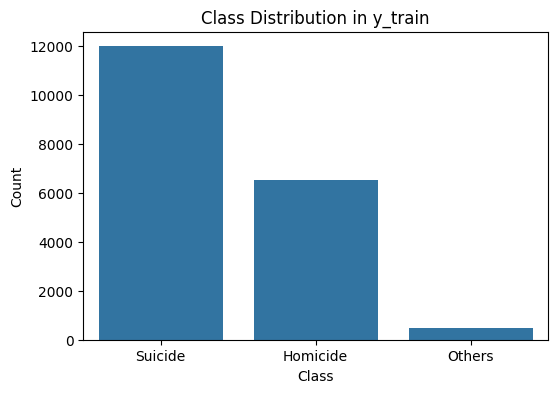

In [ ]:
unique, counts = np.unique(y_test, return_counts=True)

# Create a DataFrame to display the class distribution
counts_df = pd.DataFrame({
    'Class': [label_mapping[i] for i in unique],
    'Count': counts
})

print(counts_df)

counts_df = counts_df.sort_values(by='Count', ascending=False)

# Add a break before the graph
print("\n" + "-"*50 + "\n")

plt.figure(figsize=(6, 4))
sns.barplot(x='Class', y='Count', data=counts_df)
plt.title('Class Distribution in y_train')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

#### Step 5.3.2: Evaluating Model Performance

##### Step 5.3.2.1: One-vs-Rest Model (with GridSearchCV)

In [ ]:
micro_precision = precision_score(y_test, y_pred_ovr, average='micro')
print(f"Micro Precision: {micro_precision:.5f}")

# Micro-averaged recall
micro_recall = recall_score(y_test, y_pred_ovr, average='micro')
print(f"Micro Recall: {micro_recall:.5f}")

# Micro-averaged F1-score
micro_f1 = f1_score(y_test, y_pred_ovr, average='micro')
print(f"Micro F1-Score: {micro_f1:.5f}")

Micro Precision: 0.82728
Micro Recall: 0.82728
Micro F1-Score: 0.82728


##### Step 5.3.2.2: One-vs-Rest Model (with RandomizedSearchCV)

In [ ]:
micro_precision = precision_score(y_test, y_pred_ovr2, average='micro')
print(f"Micro-average Precision: {micro_precision:.5f}")

# Micro-averaged recall
micro_recall = recall_score(y_test, y_pred_ovr2, average='micro')
print(f"Micro-average Recall: {micro_recall:.5f}")

# Micro-averaged F1-score
micro_f1 = f1_score(y_test, y_pred_ovr2, average='micro')
print(f"Micro-average F1-Score: {micro_f1:.5f}")

Micro-average Precision: 0.82712
Micro-average Recall: 0.82712
Micro-average F1-Score: 0.82712


##### Step 5.3.2.3: Multinomial Model (with GridSearchCV)

In [ ]:
micro_precision = precision_score(y_test, y_pred_lr_gs, average='micro')
print(f"Micro-average Precision: {micro_precision:.5f}")

# Micro-averaged recall
micro_recall = recall_score(y_test, y_pred_lr_gs, average='micro')
print(f"Micro-average Recall: {micro_recall:.5f}")

# Micro-averaged F1-score
micro_f1 = f1_score(y_test, y_pred_lr_gs, average='micro')
print(f"Micro-average F1-Score: {micro_f1:.5f}")

Micro-average Precision: 0.82691
Micro-average Recall: 0.82691
Micro-average F1-Score: 0.82691


##### Step 5.3.2.4: Multinomial Model (with RandomizedSearchCV)

In [ ]:
micro_precision = precision_score(y_test, y_pred_lr_rs, average='micro')
print(f"Micro-average Precision: {micro_precision:.5f}")

# Micro-averaged recall
micro_recall = recall_score(y_test, y_pred_lr_rs, average='micro')
print(f"Micro-average Recall: {micro_recall:.5f}")

# Micro-averaged F1-score
micro_f1 = f1_score(y_test, y_pred_lr_rs, average='micro')
print(f"Micro-average F1-Score: {micro_f1:.5f}")

Micro-average Precision: 0.82712
Micro-average Recall: 0.82712
Micro-average F1-Score: 0.82712


#### Step 5.3.3: Overall Micro-Average Analysis

The following table shows the summary of the Precision, Recall and F1 Score using the Micro-Average.

<table style="width: 100%; font-size: 18px; border-collapse: collapse; text-align: center;">

<thead>
<tr>
    <th style="padding: 12px;">Model</th>
    <th style="padding: 12px;">Precision</th>
    <th style="padding: 12px;">Recall</th>
    <th style="padding: 12px;">F1 Score</th>
</tr>
</thead>

<tbody>
<tr>
    <td style="padding: 12px;">One-vs-Rest (w/ GridSearch)</td>
    <td style="padding: 12px;"><b>0.82728*</b></td>
    <td style="padding: 12px;"><b>0.82728*</b></td>
    <td style="padding: 12px;"><b>0.82728*</b></td>
</tr>

<tr>
    <td style="padding: 12px;">One-vs-Rest (w/ RandomizedSearch)</td>
    <td style="padding: 12px;">0.82712</td>
    <td style="padding: 12px;">0.82712</td>
    <td style="padding: 12px;">0.82712</td>
</tr>

<tr>
    <td style="padding: 12px;">Multinomial (w/ GridSearch)</td>
    <td style="padding: 12px;">0.82691</td>
    <td style="padding: 12px;">0.82691</td>
    <td style="padding: 12px;">0.82691</td>
</tr>

<tr>
    <td style="padding: 12px;">Multinomial (w/ RandomizedSearch)</td>
    <td style="padding: 12px;">0.82712</td>
    <td style="padding: 12px;">0.82712</td>
    <td style="padding: 12px;">0.82712</td>
</tr>


<tr>
    <td style="padding: 12px;">Best Model</td>
    <td style="padding: 12px;">One-vs-Rest (w/ GridSearch)</td>
    <td style="padding: 12px;">One-vs-Rest (w/ GridSearch)</td>
    <td style="padding: 12px;">One-vs-Rest (w/ GridSearch)</td>
</tr>


</tbody>
</table>

Overall, the One-vs-Rest Model (w/ GridSearch) is the best-performing model, with the highest precision, recall and F1 Score. This suggests that it balances performance and predictive ability better than the other models.

### Step 5.4: Overall Evaluation

Given that the time taken for all models is relatively similar, we will not prioritise these metrics for our final evaluation.

Instead, our analysis indicates that the One-vs-Rest Model (w/ GridSearch) stands out as the most consistent choice. This model not only demonstrated strong performance in Cross-Validation and Test Accuracy Scores but also achieved the highest precision, recall, and F1 Score among all evaluated models.

Therefore, we recommend this model for its balanced and reliable performance across critical evaluation metrics.

##Step 6: Applying Data Sampling

We will be using the same train-test split from Step 1.

### Step 6.1: Checking Class Distribution

#### Step 6.1.1: Class Distribution for Train Set

      Class  Count
0  Homicide  26262
1    Others   1913
2   Suicide  47760

--------------------------------------------------



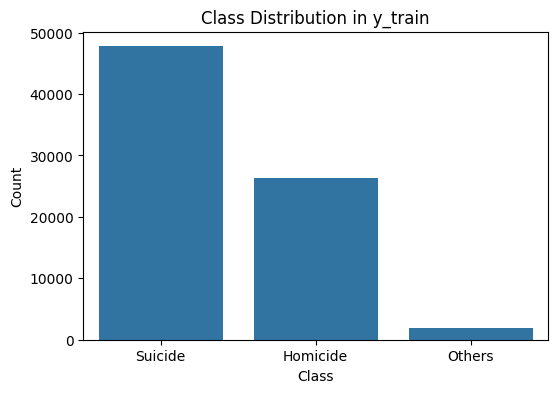

In [ ]:
unique, counts = np.unique(y_train, return_counts=True)

# Create a DataFrame to display the class distribution
counts_df = pd.DataFrame({
    'Class': [label_mapping[i] for i in unique],
    'Count': counts
})

print(counts_df)

counts_df = counts_df.sort_values(by='Count', ascending=False)

# Add a break before the graph
print("\n" + "-"*50 + "\n")

plt.figure(figsize=(6, 4))
sns.barplot(x='Class', y='Count', data=counts_df)
plt.title('Class Distribution in y_train')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

By visualising the class distribution of the train set, we can see that "Others" is significantly underrepresented compared to the other two classes. This class imbalance can cause the model to overfit to the majority classes ("Homicide" and "Suicide"), while struggling to accurately predict instances of the minority class ("Others"). As a result, the model may exhibit poor generalisation performance, particularly when identifying the minority class.


#### Step 6.1.2: Class Distribution for Test Set

      Class  Count
0  Homicide   6529
1    Others    481
2   Suicide  11974

--------------------------------------------------



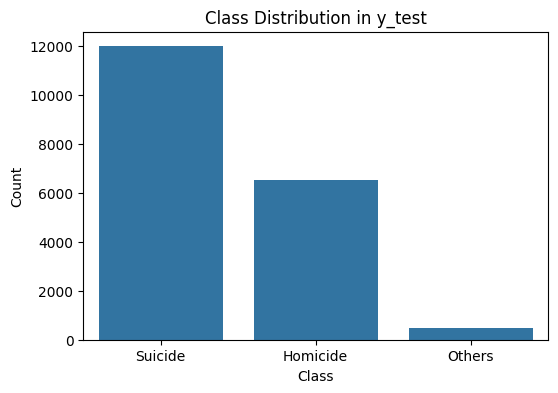

In [ ]:
unique, counts = np.unique(y_test, return_counts=True)

# Create a DataFrame to display the class distribution
counts_df = pd.DataFrame({
    'Class': [label_mapping[i] for i in unique],
    'Count': counts
})

print(counts_df)

counts_df = counts_df.sort_values(by='Count', ascending=False)

# Add a break before the graph
print("\n" + "-"*50 + "\n")

plt.figure(figsize=(6, 4))
sns.barplot(x='Class', y='Count', data=counts_df)
plt.title('Class Distribution in y_test')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

However, by visualising the class distribution of the test set, we see that it actually follows the same imbalanced class distribution as the train set, where "Others" is significantly represented too.


#### Step 6.1.3: Justification for Undersampling

As such, using oversampling techniques like duplicating the minority class or applying SMOTE may not be optimal here. Oversampling would create an artificial balance in the train set, potentially leading the model to anticipate a more evenly distributed class representation that does not align with the actual test set distribution. This discrepancy could lead to a bias in the model's predictions and impact its real-world performance.


Instead, we believe that undersampling the majority classes in the train set appears would be a more suitable strategy. This is because the model will be trained with a distribution that mirrors what it will encounter in evaluation, potentially leading to a more realistic performance assessment.


However, we understand that undersampling will lead to data reduction issues. Thus, we will retain the minority class "Others" at 1913 instances, while setting target counts of 5000 for both "Homicide" and "Suicide." This approach allows us to build a model with a class distribution that reflects the test set, without reducing the majority classes all the way down to the size of the minority class.

### Step 6.2: Applying Undersampling

In [ ]:
sampling_strategy = {
    0: 5000,
    2: 5000,
    1: 1913
}

# Create a RandomUnderSampler object
rus = RandomUnderSampler(random_state=0, sampling_strategy=sampling_strategy)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

In [ ]:
# Print the new class distribution
unique, counts = np.unique(y_train_resampled, return_counts=True)

# Create a DataFrame to display the class distribution
counts_df = pd.DataFrame({
    'Class': [label_mapping[i] for i in unique],
    'Count': counts
})

print(counts_df)

      Class  Count
0  Homicide   5000
1    Others   1913
2   Suicide   5000


Now, we have a new, resampled dataset (X_train_resampled and y_train_resampled) that attempts to balances the classes.

### Step 6.3: Feature Scaling

To improve convergence speed and model performance, we decided to standardize the numerical features using standard scaling. This process ensures that all numerical features have a mean of 0 and a standard deviation of 1, which could help the model to converge more efficiently and perform better.

In [ ]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

## Step 7: Implementing a Binary Logistic Regression Model (With Data Sampling)

We will now train the OVR Model again with the new training data set.

###Step 7.1: Running the Basic Logistic Regression Model

In [ ]:
# Create Logistic Regression model without specifying the solver
lr_basic_model_ovr_ds = LogisticRegression(max_iter=1000, multi_class='ovr')

# Fit the model directly with the training data
lr_basic_model_ovr_ds.fit(X_train_scaled, y_train_resampled)

y_pred_lr_basic_ovr_ds = lr_basic_model_ovr_ds.predict(X_test_scaled)

# Calculate accuracy
print("Accuracy score:",accuracy_score(y_test, y_pred_lr_basic_ovr_ds))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy score: 0.810630004214075


The basic OVR logistic regression model gives us an accuracy of 0.81063 (5 d.p).

We will now perform cross-validation through GridSearchCV to improve this.

###Step 7.2: Running the One-vs-Rest Model (with GridSearchCV)



We decided to use Grid Search to find the best hyperparameters for our model. This involves testing a specified set of hyperparameters to determine the optimal combination that yields the best performance.

In [ ]:
# Logistic Regression
startTime_ovr1_ds = time.time()
model_ovr_ds = LogisticRegression(max_iter=1000)

Parameters Used for the Model are as follows:

<table>
<thead>
<td>Parameter</td>
<td>Value
<td>Description</td>
</thead>
<tr>
<td><code>multi-class</code></td>
<td><code>ovr</code></td>
<td>Used to specify a method on handling multiple classes in the dataset. <br/>(As mentioned above, a logistic regression handles binary classes,<br/> making this parameter essential in developing our model).
</tr>
<tr><td rowspan=3><code>solver</code></td>
<td><code>lbfgs</code></td>
<td>* Solvers refer to the optimisation method to tune the parameters for <br/> the logistic regression model. lfgbs is a popular solver in context of </br>logistic regression models.</td></tr>
<tr><td><code>sag</code></td>
<td rowspan=2>Both sag and saga solvers are similar as they are built upon the <br/> Stochastic Gradient Descent method introduced in lecture 5. One of <br/> the primary difference is that saga has variance-reduction. </td></tr>
<tr><td><code>saga</code></td>
<tr><td><code>C</code></td>
<td><code>0.001</code> to <code>10</code></td>
<td>C controls the regularisation strength, allowing for the model to be more generalised.</td></tr>
</table>

In [ ]:
# Define Param Grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 5, 10],  # Inverse of regularization strength at constant intervals
    'multi_class': ['ovr'],
    'solver': ['lbfgs', 'sag', 'saga'],  # Trying different solvers
}

# GridSearchCV
grid_search_ovr_ds = GridSearchCV(model_ovr_ds, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Set Up Time
setupTime_ovr1_ds = time.time()

# Fit the model with Grid Search
grid_search_ovr_ds.fit(X_train_scaled, y_train_resampled)

# End Time
endTime_ovr1_ds = time.time()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_C', 'param_multi_class', 'param_solver', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')


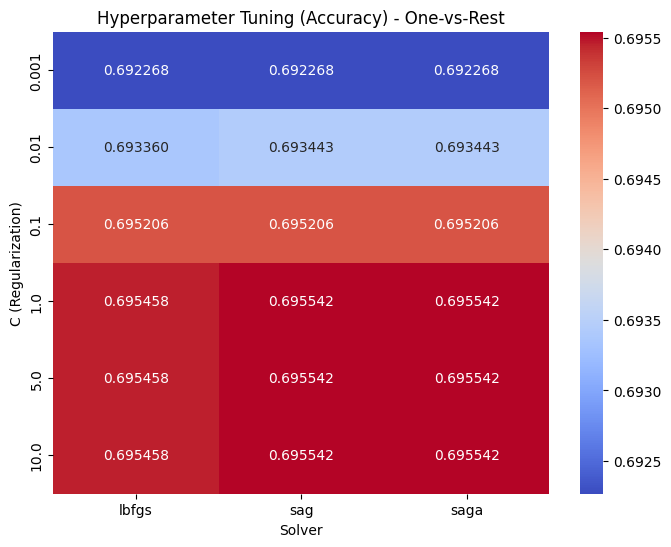

In [ ]:
# Extract results into a DataFrame
results_ovr1_ds = pd.DataFrame(grid_search_ovr_ds.cv_results_)

# Display the columns to identify relevant metrics
print(results_ovr1_ds.columns)

pivot_table_ovr1_ds = results_ovr1_ds.pivot(index='param_C', columns='param_solver', values='mean_test_score')

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table_ovr1_ds, annot=True, cmap='coolwarm', fmt='.6f')
plt.title('Hyperparameter Tuning (Accuracy) - One-vs-Rest')
plt.xlabel('Solver')
plt.ylabel('C (Regularization)')
plt.show()

The heatmap above shows the different accuracies that we get when training the model with different parameters.



In [ ]:
# Get the best parameters and score
print("Best Parameters: ", grid_search_ovr_ds.best_params_)
print("Best Cross-validation Score: ", grid_search_ovr_ds.best_score_)

Best Parameters:  {'C': 1, 'multi_class': 'ovr', 'solver': 'sag'}
Best Cross-validation Score:  0.6955419950932878


As such, we will use the best parameters (C = 1 and the 'sag' solver) as given from the Grid Search to make the best OVR model.

###Step 7.3: Identifying Accuracy Score (with GridSeachCV)

In [ ]:
lr_model_ovr_ds = grid_search_ovr_ds.best_estimator_

# pred Start Time
predStartTime_ovr1_ds = time.time()

y_pred_ovr_ds = lr_model_ovr_ds.predict(X_test_scaled)

# pred End Time
predEndTime_ovr1_ds = time.time()

# Calculate accuracy
print("Accuracy score:",accuracy_score(y_test, y_pred_ovr_ds))

Accuracy score: 0.8105773282764434


###Step 7.4: Running the One-vs-Rest Model (with RandomizedSearchCV)


We will now use RandomizedSearchCV instead of GridSearchCV.


In [ ]:
startTime_ovr2_ds = time.time()
model_ovr_ds = LogisticRegression(max_iter=1000)

In [ ]:
# Define the refined parameter distribution for RandomizedSearchCV
param_distributions = {
    'C': uniform(0.001, 10),  # Controlled C values up to 3 decimal places
    'multi_class': ['ovr'],        # One-vs-Rest strategy
    'solver': ['lbfgs', 'sag', 'saga'],  # Trying different solvers
}

# RandomizedSearchCV
random_search_ovr_ds = RandomizedSearchCV(model_ovr_ds, param_distributions, n_iter=20, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)

# Set Up Time
setupTime_ovr2_ds = time.time()

# Fit the model with Randomized Search
random_search_ovr_ds.fit(X_train_scaled, y_train_resampled)

# End Time
endTime_ovr2_ds = time.time()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_C', 'param_multi_class', 'param_solver', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')


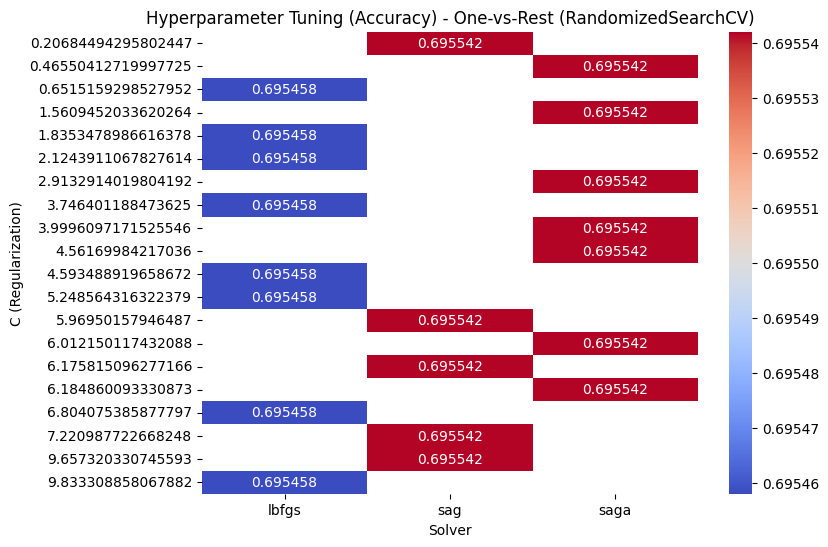

In [ ]:
# Extract results into a DataFrame
results_ovr2_ds = pd.DataFrame(random_search_ovr_ds.cv_results_)

# Display the columns to identify relevant metrics
print(results_ovr2_ds.columns)

pivot_table_ovr2_ds = results_ovr2_ds.pivot(index='param_C', columns='param_solver', values='mean_test_score')

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table_ovr2_ds, annot=True, cmap='coolwarm', fmt='.6f')
plt.title('Hyperparameter Tuning (Accuracy) - One-vs-Rest (RandomizedSearchCV)')
plt.xlabel('Solver')
plt.ylabel('C (Regularization)')
plt.show()

The heatmap above shows the different accuracies that we get when training the model with different parameters.

In [ ]:
# Print the best parameters
print("Best parameters found:", random_search_ovr_ds.best_params_)
print("Best accuracy score:", random_search_ovr_ds.best_score_)

Best parameters found: {'C': 5.96950157946487, 'multi_class': 'ovr', 'solver': 'sag'}
Best accuracy score: 0.6955419950932878


As such, we will use the best parameters (C = 5.96950 and the 'sag' solver) as given from the Randomized Search to make the best OVR model.

###Step 7.5: Identifying Accuracy Score (with RandomizedSearchCV)

In [ ]:
lr_model_ovr2_ds = random_search_ovr_ds.best_estimator_

# pred Start Time
predStartTime_ovr2_ds = time.time()

y_pred_ovr2_ds = lr_model_ovr2_ds.predict(X_test_scaled)

# pred End Time
predEndTime_ovr2_ds = time.time()

# Calculate accuracy
print("Accuracy score:",accuracy_score(y_test, y_pred_ovr2_ds))

Accuracy score: 0.810630004214075


## Step 8: Implementing a Multinomial Logistic Regression Model  (With Data Sampling)


We will now train the Multinomial Model again with the new training data set.

###Step 8.1: Running the Basic Multinomial Model

In [ ]:
# Create Logistic Regression model without specifying the solver
lr_basic_model_ds = LogisticRegression(max_iter=1000, multi_class='multinomial')

# Fit the model directly with the training data
lr_basic_model_ds.fit(X_train_scaled, y_train_resampled)

y_pred_lr_basic_ds = lr_basic_model_ds.predict(X_test_scaled)

# Calculate accuracy
print("Accuracy score:",accuracy_score(y_test, y_pred_lr_basic_ds))

Accuracy score: 0.8114201432785504


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


The basic multinomial logistic regression model gives us an accuracy of 0.81142 (5 d.p).

We will now perform cross-validation through GridSearchCV to improve this.

###Step 8.2: Running the Multinomial Model (with GridSearchCV)

In [ ]:
# Start Time
startTime_mult1_ds = time.time()
model_ds = LogisticRegression(max_iter=1000)

Parameters Used for the Model are as follows:

<table>
<thead>
<td>Parameter</td>
<td>Value
<td>Description</td>
</thead>
<tr>
<td><code>multi-class</code></td>
<td><code>multinomial</code></td>
<td>Uses a single model to handle all classes simultaneously. The model <br/>applies the softmax function to predict the probability distribution over <br/>all classes, and the cross-entropy loss is minimised during training.<br/> This is a true multiclass approach.
</tr>
<tr><td rowspan=3><code>solver</code></td>
<td><code>lbfgs</code></td>
<td>* Solvers refer to the optimisation method to tune the parameters for <br/> the logistic regression model. lfgbs is a popular solver in context of </br>logistic regression models.</td></tr>
<tr><td><code>sag</code></td>
<td rowspan=2>Both sag and saga solvers are similar as they are built upon the <br/> Stochastic Gradient Descent method introduced in lecture 5. One of <br/> the primary difference is that saga has variance-reduction. </td></tr>
<tr><td><code>saga</code></td>
<tr><td><code>C</code></td>
<td><code>0.001</code> to <code>10</code></td>
<td>C controls the regularisation strength, allowing for the model to be more generalised.</td></tr>
</table>

In [ ]:
# Define the hyperparameter distributions
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 5, 10], # Inverse of regularization strength
    'multi_class': ['multinomial'],
    'solver': ['lbfgs', 'sag', 'saga'], # Trying different solvers
}

# Set up GridSearchCV
grid_search_ds = GridSearchCV(model_ds, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Set Up Time
setupTime_mult1_ds = time.time()

# Fit the model with Grid Search
grid_search_ds.fit(X_train_scaled, y_train_resampled)

# End Time
endTime_mult1_ds = time.time()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


The heatmap below illustrates the various accuracies achieved when training the model with different parameters.


Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_C', 'param_multi_class', 'param_solver', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')


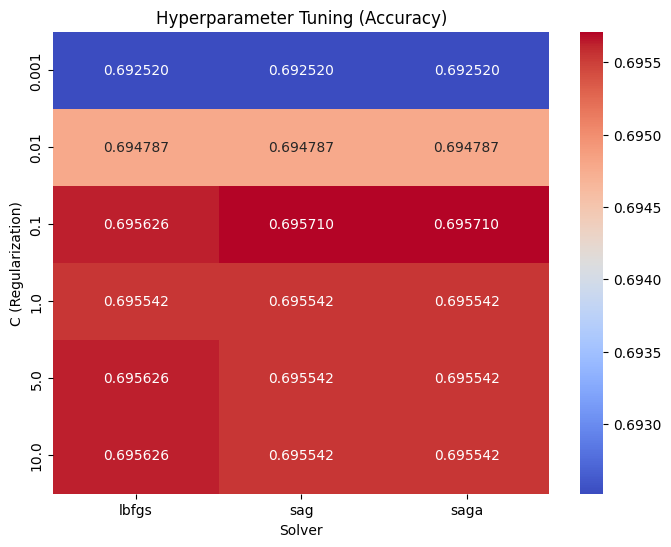

In [ ]:
# Extract results into a DataFrame
results_multi_ds = pd.DataFrame(grid_search_ds.cv_results_)

# Display the columns to identify relevant metrics
print(results_multi_ds.columns)

pivot_table_ds = results_multi_ds.pivot(index='param_C', columns='param_solver', values='mean_test_score')

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table_ds, annot=True, cmap='coolwarm', fmt='.6f')
plt.title('Hyperparameter Tuning (Accuracy)')
plt.xlabel('Solver')
plt.ylabel('C (Regularization)')
plt.show()

The heatmap above shows the different accuracies that we get when training the model with different parameters.

In [ ]:
# Get the best parameters and score
print("Best Parameters with GridSearchCV: ", grid_search_ds.best_params_)
print("Best Cross-validation Score: ", grid_search_ds.best_score_)

Best Parameters with GridSearchCV:  {'C': 0.1, 'multi_class': 'multinomial', 'solver': 'sag'}
Best Cross-validation Score:  0.6957099916741627


As such, we will use the best parameters (C = 0.1 and the 'sag' solver) as given from the Grid Search to make the best multinomial logistic regression model.

###Step 8.3: Identifying Accuracy (with GridSearchCV)


In [ ]:
lr_model_mult1_ds = grid_search_ds.best_estimator_

# pred Start Time
predStartTime_lr1_ds = time.time()

y_pred_lr_gs_ds = lr_model_mult1_ds.predict(X_test_scaled)

# pred End Time
predEndTime_lr1_ds = time.time()

# Calculate accuracy
print("Accuracy score:",accuracy_score(y_test, y_pred_lr_gs_ds))

Accuracy score: 0.8118415507796038


###Step 8.4: Running the Multinomial Model (with RandomizedSearchCV)

Once again, we will now use RandomizedSearchCV instead of GridSearchCV.

In [ ]:
# Start Time
startTime_mult2_ds = time.time()
model_ds = LogisticRegression(max_iter=1000)

In [ ]:
# Define the refined parameter distribution with predefined C values to reduce clutter
param_distributions = {
    'C': uniform(0.001, 10),  # Controlled C values up to 3 decimal places
    'multi_class': ['multinomial'],                # One-vs-Rest strategy
    'solver': ['lbfgs', 'sag', 'saga'],    # Trying different solvers
}

# Set up RandomizedSearchCV with fewer iterations for faster performance
random_search_mult2_ds = RandomizedSearchCV(model_ds, param_distributions, n_iter=20, cv=5,
                                       scoring='accuracy', n_jobs=-1, random_state=42)

# Record setup time
setupTime_mult2_ds = time.time()

# Fit the model with Randomized Search
random_search_mult2_ds.fit(X_train_scaled, y_train_resampled)

# End time
endTime_mult2_ds = time.time()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_C', 'param_multi_class', 'param_solver', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')


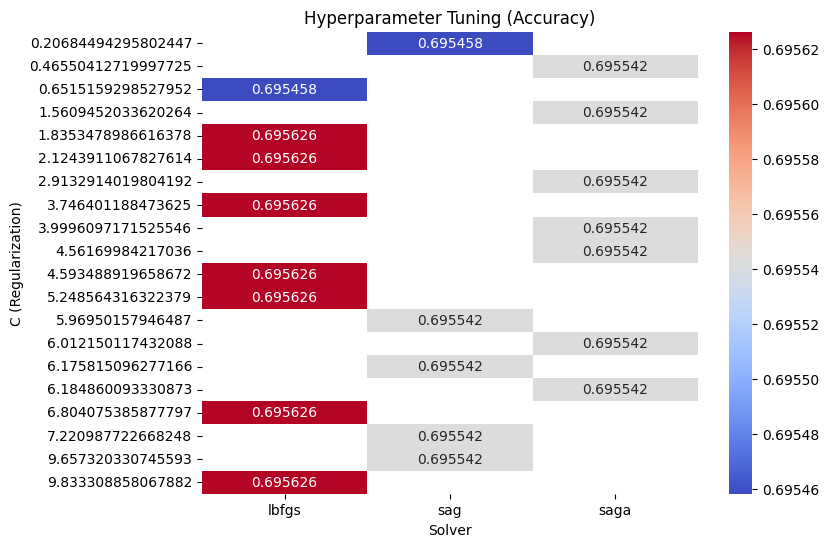

In [ ]:
# Extract results into a DataFrame
results_multi2_ds = pd.DataFrame(random_search_mult2_ds.cv_results_)

# Display the columns to identify relevant metrics
print(results_multi2_ds.columns)

pivot_table_ds = results_multi2_ds.pivot(index='param_C', columns='param_solver', values='mean_test_score')

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table_ds, annot=True, cmap='coolwarm', fmt='.6f')
plt.title('Hyperparameter Tuning (Accuracy)')
plt.xlabel('Solver')
plt.ylabel('C (Regularization)')
plt.show()

The heatmap above shows the different accuracies that we get when training the model with different parameters.

In [ ]:
# Get the best parameters and score
print("Best Parameters with RandomizedSearchCV: ", random_search_mult2_ds.best_params_)
print("Best Cross-validation Score: ", random_search_mult2_ds.best_score_)

Best Parameters with RandomizedSearchCV:  {'C': 3.746401188473625, 'multi_class': 'multinomial', 'solver': 'lbfgs'}
Best Cross-validation Score:  0.6956261343204542


As such, we will use the best parameters (C = 3.74640 and the 'lbfgs' solver) as given from the Randomized Search to make the best multinomial logistic regression model.

###Step 8.5: Identifying Accuracy (with RandomisedSearchCV)

In [ ]:
lr_model_mult2_ds = random_search_mult2_ds.best_estimator_

# pred Start Time
predStartTime_lr2_ds = time.time()

y_pred_lr_rs_ds = lr_model_mult2_ds.predict(X_test_scaled)

# pred End Time
predEndTime_lr2_ds = time.time()

# Calculate accuracy
print("Accuracy score:", accuracy_score(y_test, y_pred_lr_rs_ds))

Accuracy score: 0.8114201432785504


## Step 9: Evaluation of Models (With Data Sampling)

To determine which is best, we will evaluate the models based on following criterias:

<ul>
<li>Time Analysis
<ul>
<li>Run-time of Setting up the Model (Set Up Time)</li>
<li>Run-time of Tuning the Parameters (Run Time)</li>
<li>Run-time of Training the Model & Predicting the Outcome $Y$ Based on Input Features $X$ (Prediction Time)</li>
</li></ul>
<li>Cross-Validation and Test Accuracy Scores</li>
<li>Using Micro-Average:</li>
<ul>
<li>Accuracy</li>
<li>Recall</li>
<li>Precision</li>
</ul>

### Step 9.1: Time Analysis


We will now the models based on the time it takes.

#### Step 9.1.1: One-vs-Rest Model (with GridSearchCV)

In [ ]:
#Overall Set Up Duration
overall_setupTime_ovr1_ds = setupTime_ovr1_ds - startTime_ovr1_ds
print("Overall Set Up Time: ", overall_setupTime_ovr1_ds)

#Overall Run Time
overall_runTime_ovr1_ds = endTime_ovr1_ds - startTime_ovr1_ds
print("Overall Run Time: ", overall_runTime_ovr1_ds)

#Overall Prediction Time
predTime_ovr1_ds = predEndTime_ovr1_ds - predStartTime_ovr1_ds
print("Overall Prediction Time: ", predTime_ovr1_ds)

Overall Set Up Time:  0.014421701431274414
Overall Run Time:  20.528809785842896
Overall Prediction Time:  0.002138853073120117


#### Step 9.1.2: One-vs-Rest Model (with RandomizedSearchCV)

In [ ]:
#Overall Set Up Duration
overall_setupTime_ovr2_ds = setupTime_ovr2_ds - startTime_ovr2_ds
print("Overall Set Up Time: ", overall_setupTime_ovr2_ds)

#Overall Run Time
overall_runTime_ovr2_ds = endTime_ovr2_ds - setupTime_ovr2_ds
print("Overall Run Time: ", overall_runTime_ovr2_ds)

#Overall Prediction Time
predTime_ovr2_ds = predEndTime_ovr2_ds - predStartTime_ovr2_ds
print("Overall Prediction Time: ", predTime_ovr2_ds)

Overall Set Up Time:  0.006735324859619141
Overall Run Time:  28.176079511642456
Overall Prediction Time:  0.002208232879638672


#### Step 9.1.3: Multinomial Model (with GridSearchCV)

In [ ]:
#Overall Set Up Duration
overall_setupTime_mult1_ds = setupTime_mult1_ds - startTime_mult1_ds
print("Overall Set Up Time: ", overall_setupTime_mult1_ds)

#Overall Run Time
overall_runTime_mult1_ds = endTime_mult1_ds - startTime_mult1_ds
print("Overall Run Time: ", overall_runTime_mult1_ds)

#Overall Prediction Time
predTime_mult1_ds = predEndTime_lr1_ds - predStartTime_lr1_ds
print("Overall Prediction Time: ", predTime_mult1_ds)

Overall Set Up Time:  0.005428791046142578
Overall Run Time:  12.746368885040283
Overall Prediction Time:  0.0020401477813720703


#### Step 9.1.4: Multinomial Model (with RandomizedSearchCV)

In [ ]:
#Overall Set Up Duration
overall_setupTime_mult2_ds = setupTime_mult2_ds - startTime_mult2_ds
print("Overall Set Up Time: ", overall_setupTime_mult2_ds)

#Overall Run Time
overall_runTime_mult2_ds = endTime_mult2_ds - setupTime_mult2_ds
print("Overall Run Time: ", overall_runTime_mult2_ds)

#Overall Prediction Time
predTime_mult2_ds = predEndTime_lr2_ds - predStartTime_lr2_ds
print("Overall Prediction Time: ", predTime_mult2_ds)

Overall Set Up Time:  0.006087064743041992
Overall Run Time:  16.318583011627197
Overall Prediction Time:  0.002075672149658203


#### Step 9.1.5: Overall Time Analysis

The following table shows the summary of the time taken for each of the models.

<table style="width: 100%; font-size: 18px; border-collapse: collapse; text-align: center;">

<thead>
<tr>
    <th style="padding: 12px;">Model</th>
    <th style="padding: 12px;">Set-Up Time (s)</th>
    <th style="padding: 12px;">Run Time (s)</th>
    <th style="padding: 12px;">Prediction Time (s)</th>
</tr>
</thead>

<tbody>
<tr>
    <td style="padding: 12px;">One-vs-Rest (w/ GridSearch)</td>
    <td style="padding: 12px;">0.014422</td>
    <td style="padding: 12px;">20.528810</td>
    <td style="padding: 12px;">0.002139</td>
</tr>

<tr>
    <td style="padding: 12px;">One-vs-Rest (w/ RandomizedSearch)</td>
    <td style="padding: 12px;">0.006735</td>
    <td style="padding: 12px;">28.176080</td>
    <td style="padding: 12px;">0.002208</td>
</tr>

<tr>
    <td style="padding: 12px;">Multinomial (w/ GridSearch)</td>
    <td style="padding: 12px;"><b>0.005429*</b></td>
    <td style="padding: 12px;"><b>12.746369*</b></td>
    <td style="padding: 12px;"><b>0.002040*</b></td>
</tr>

<tr>
    <td style="padding: 12px;">Multinomial (w/ RandomizedSearch)</td>
    <td style="padding: 12px;">0.006087</td>
    <td style="padding: 12px;">16.318583</td>
    <td style="padding: 12px;">0.002076</td>
</tr>

<tr>
    <td style="padding: 12px;">Best Model</td>
    <td style="padding: 12px;">Multinomial (w/ GridSearch)</td>
    <td style="padding: 12px;">Multinomial (w/ GridSearch)</td>
    <td style="padding: 12px;">Multinomial (w/ GridSearch)</td>
</tr>


</tbody>
</table>

In our analysis of the different model configurations, we observed that the time taken for set-up, run, and prediction across all the models is relatively similar, with only minor variations.

For Set-Up Time, the Multinomial Model (w/ GridSearch) is the fastest, taking only 0.005429s.

The Multinomial Model (w/ GridSearch) had the fastest Run Time, taking only 12.746369s.

Lastly, the Multinomial Model (w/ GridSearch) has the quickest Prediction Time at 0.002040s.

### Step 9.2: Cross-Validation and Test Accuracy Scores

The following table shows the summary of the key evaluators for each of the models.

<table style="width: 100%; font-size: 18px; border-collapse: collapse; text-align: center;">

<thead>
<tr>
    <th style="padding: 12px;">Model</th>
    <th style="padding: 12px;">Best Cross-Validation Score</b></th>
    <th style="padding: 12px;">Test Accuracy Score</th>
</tr>
</thead>

<tbody>
<tr>
    <td style="padding: 12px;">One-vs-Rest (w/ GridSearch)</td>
    <td style="padding: 12px;">0.6955419950932878   </td>
    <td style="padding: 12px;">0.8105773282764434</td>

</tr>
<tr>
    <td style="padding: 12px;">One-vs-Rest (w/ RandomizedSearch)</td>
    <td style="padding: 12px;">0.6955419950932878</td>
    <td style="padding: 12px;">0.810630004214075</td>

</tr>
<tr>
    <td style="padding: 12px;">Multinomial (w/ GridSearch)</td>
    <td style="padding: 12px;"><b>0.6957099916741627*</b></td>
    <td style="padding: 12px;"><b>0.8118415507796038*</b></td>

</tr>
<tr>
    <td style="padding: 12px;">Multinomial (w/ RandomizedSearch)</td>
    <td style="padding: 12px;">0.6956261343204542</td>
    <td style="padding: 12px;">0.8114201432785504</td>
</tr>

<tr>
    <td style="padding: 12px;">Best Model</td>
    <td style="padding: 12px;">Multinomial (w/ GridSearch)</td>
    <td style="padding: 12px;">Multinomial (w/ GridSearch)</td>

</tr>


</tbody>
</table>

Based on the results, the Multinomial model (with GridSearchCV) is the best performing model, achieving both the highest Cross-Validation Score (0.69571) and the highest Test Accuracy Score (0.81184). This suggests that the multinomial approach with GridSearchCV not only generalizes better during cross-validation but also performs consistently well on unseen test data.

While the other models (One-vs-Rest and RandomizedSearch configurations) also performed reasonably well, the Multinomial (w/ GridSearch) provides the best balance of performance, making it the most suitable model for this task.

### Step 9.3: Using Micro-Average

#### Step 9.3.1: Accounting for class imbalance

Like in Step 5.3.1, to address the class imbalance in the test set, we will use micro-averaging, which weighs each instance equally across all classes, ensuring that the model's performance is not biased toward the majority classes.

#### Step 9.3.2: Evaluating Model Performance

##### Step 9.3.2.1: One-vs-Rest Model (with GridSearchCV)

In [ ]:
micro_precision = precision_score(y_test, y_pred_ovr_ds, average='micro')
print(f"Micro-average Precision: {micro_precision:.5f}")

# Micro-averaged recall
micro_recall = recall_score(y_test, y_pred_ovr_ds, average='micro')
print(f"Micro-average Recall: {micro_recall:.5f}")

# Micro-averaged F1-score
micro_f1 = f1_score(y_test, y_pred_ovr_ds, average='micro')
print(f"Micro-average F1-Score: {micro_f1:.5f}")

Micro-average Precision: 0.81058
Micro-average Recall: 0.81058
Micro-average F1-Score: 0.81058


##### Step 9.3.2.2: One-vs-Rest Model (with RandomizedSearchCV)

In [ ]:
micro_precision = precision_score(y_test, y_pred_ovr2_ds, average='micro')
print(f"Micro-average Precision: {micro_precision:.5f}")

# Micro-averaged recall
micro_recall = recall_score(y_test, y_pred_ovr2_ds, average='micro')
print(f"Micro-average Recall: {micro_recall:.5f}")

# Micro-averaged F1-score
micro_f1 = f1_score(y_test, y_pred_ovr2_ds, average='micro')
print(f"Micro-average F1-Score: {micro_f1:.5f}")

Micro-average Precision: 0.81063
Micro-average Recall: 0.81063
Micro-average F1-Score: 0.81063


##### Step 9.3.2.3: Multinomial Model (with GridSearchCV)

In [ ]:
micro_precision = precision_score(y_test, y_pred_lr_gs_ds, average='micro')
print(f"Micro-average Precision: {micro_precision:.5f}")

# Micro-averaged recall
micro_recall = recall_score(y_test, y_pred_lr_gs_ds, average='micro')
print(f"Micro-average Recall: {micro_recall:.5f}")

# Micro-averaged F1-score
micro_f1 = f1_score(y_test, y_pred_lr_gs_ds, average='micro')
print(f"Micro-average F1-Score: {micro_f1:.5f}")

Micro-average Precision: 0.81184
Micro-average Recall: 0.81184
Micro-average F1-Score: 0.81184


##### Step 9.3.2.4: Multinomial Model (with RandomizedSearchCV)

In [ ]:
micro_precision = precision_score(y_test, y_pred_lr_rs_ds, average='micro')
print(f"Micro-average Precision: {micro_precision:.5f}")

# Micro-averaged recall
micro_recall = recall_score(y_test, y_pred_lr_rs_ds, average='micro')
print(f"Micro-average Recall: {micro_recall:.5f}")

# Micro-averaged F1-score
micro_f1 = f1_score(y_test, y_pred_lr_rs_ds, average='micro')
print(f"Micro-average F1-Score: {micro_f1:.5f}")

Micro-average Precision: 0.81142
Micro-average Recall: 0.81142
Micro-average F1-Score: 0.81142


#####Step 9.3.2.5 Randomised Search vs. Grid Search

Overall, both Randomised and Grid Search have their own respective shortcomings that justify their performances.

In general, the "trial-and-error" aspect of both searches result in wasted resources.

The Grid Search has large computational and time demands as the number of combinations grow exponentially wiht the number of hyperparameters. For large datasets the grid search becomes especially large, made worse by oversampling - making handling imbalanced data and hyperparameter tuning a poor combination. Uniform sampling can also waste computational resources on less relevant parameter sample spaces.

The Randomised Search on the other hand can struggle to find the optimal parameters if the search space is not well defined. The randomised (or stochastic) element of the randomised search also causes a lack of consistency - possibly suggesting different parameters with each run.

#### Step 9.3.3: Overall Micro-Average Analaysis

The following table shows the summary of the Precision, Recall and F1 Score using the Micro-Average.

<table style="width: 100%; font-size: 18px; border-collapse: collapse; text-align: center;">

<thead>
<tr>
    <th style="padding: 12px;">Model</th>
    <th style="padding: 12px;">Precision</th>
    <th style="padding: 12px;">Recall</th>
    <th style="padding: 12px;">F1 Score</th>
</tr>
</thead>

<tbody>
<tr>
    <td style="padding: 12px;">One-vs-Rest (w/ GridSearch)</td>
    <td style="padding: 12px;">0.81058</td>
    <td style="padding: 12px;">0.81058</td>
    <td style="padding: 12px;">0.81058</td>
</tr>

<tr>
    <td style="padding: 12px;">One-vs-Rest (w/ RandomizedSearch)</td>
    <td style="padding: 12px;">0.81063</td>
    <td style="padding: 12px;">0.81063</td>
    <td style="padding: 12px;">0.81063</td>
</tr>

<tr>
    <td style="padding: 12px;">Multinomial (w/ GridSearch)</td>
    <td style="padding: 12px;"><b>0.81184*</b></td>
    <td style="padding: 12px;"><b>0.81184*</b></td>
    <td style="padding: 12px;"><b>0.81184*</b></td>
</tr>

<tr>
    <td style="padding: 12px;">Multinomial (w/ RandomizedSearch)</td>
    <td style="padding: 12px;">0.81142</td>
    <td style="padding: 12px;">0.81142</td>
    <td style="padding: 12px;">0.81142</td>
</tr>


<tr>
    <td style="padding: 12px;">Best Model</td>
    <td style="padding: 12px;">Multinomial (w/ GridSearch)</td>
    <td style="padding: 12px;">Multinomial (w/ GridSearch)</td>
    <td style="padding: 12px;">Multinomial (w/ GridSearch)</td>
</tr>


</tbody>
</table>

Overall, the Multinomial model (w/ GridSearch) is the best-performing model, with the highest precision, recall and F1 Score. This suggests that it balances performance and predictive ability better than the other models.

### Step 9.4: Comparing with Macro-Average

Another way to evaluate the model would be using Macro-Averages instead. However, due to the imbalanced nature of the dataset, Macro-Averaging may not be the most appropriate evaluation method.

This approach can disproportionately penalise the model for poor performance on minority classes, even if it performs well on the majority class.

Nonetheless, we will calculate the Macro-Averages to demonstrate the impact of class imbalance. By doing so, we can better understand how the model’s performance varies across the different classes and highlight why Micro-Averaging is more suitable for this task.

#### Step 9.4.1: Evaluating Model Performance

##### Step 9.4.1.1: One-vs-Rest Model (with GridSearchCV)

In [ ]:
# Overall classification report
print(classification_report(y_test, y_pred_ovr_ds, digits = 5))

              precision    recall  f1-score   support

           0    0.73876   0.78052   0.75907      6529
           1    0.09211   0.01455   0.02513       481
           2    0.85637   0.85894   0.85766     11974

    accuracy                        0.81058     18984
   macro avg    0.56241   0.55134   0.54729     18984
weighted avg    0.79656   0.81058   0.80266     18984



In [ ]:
# Macro-Averaged Precision
macro_precision = precision_score(y_test, y_pred_ovr_ds, average='macro')
print(f"Macro-average Precision: {macro_precision:.5f}")

# Macro-Averaged Recall
macro_recall = recall_score(y_test, y_pred_ovr_ds, average='macro')
print(f"Macro-average Recall: {macro_recall:.5f}")

# Macro-Averaged F1 Score
macro_f1 = f1_score(y_test, y_pred_ovr_ds, average='macro')
print(f"Macro-average F1-Score: {macro_f1:.5f}")

Macro-average Precision: 0.56241
Macro-average Recall: 0.55134
Macro-average F1-Score: 0.54729


##### Step 9.4.1.2: One-vs-Rest Model (with RandomizedSearchCV)

In [ ]:
# Overall classification report
print(classification_report(y_test, y_pred_ovr2_ds, digits = 5))

              precision    recall  f1-score   support

           0    0.73880   0.78067   0.75916      6529
           1    0.09211   0.01455   0.02513       481
           2    0.85644   0.85894   0.85769     11974

    accuracy                        0.81063     18984
   macro avg    0.56245   0.55139   0.54733     18984
weighted avg    0.79662   0.81063   0.80271     18984



In [ ]:
# Macro-Averaged Precision
macro_precision = precision_score(y_test, y_pred_ovr2_ds, average='macro')
print(f"Macro-average Precision: {macro_precision:.5f}")

# Macro-Averaged Recall
macro_recall = recall_score(y_test, y_pred_ovr2_ds, average='macro')
print(f"Macro-average Recall: {macro_recall:.5f}")

# Macro-Averaged F1 Score
macro_f1 = f1_score(y_test, y_pred_ovr2_ds, average='macro')
print(f"Macro-average F1-Score: {macro_f1:.5f}")

Macro-average Precision: 0.56245
Macro-average Recall: 0.55139
Macro-average F1-Score: 0.54733


##### Step 9.4.1.3: Multinomial Model (with GridSearchCV)

In [ ]:
# Overall classification report
print(classification_report(y_test, y_pred_lr_gs_ds, digits = 5))

              precision    recall  f1-score   support

           0    0.74325   0.77991   0.76114      6529
           1    0.10784   0.02287   0.03774       481
           2    0.85687   0.86095   0.85890     11974

    accuracy                        0.81184     18984
   macro avg    0.56932   0.55457   0.55259     18984
weighted avg    0.79882   0.81184   0.80447     18984



In [ ]:
# Macro-Averaged Precision
macro_precision = precision_score(y_test, y_pred_lr_gs_ds, average='macro')
print(f"Macro-average Precision: {macro_precision:.5f}")

# Macro-Averaged Recall
macro_recall = recall_score(y_test, y_pred_lr_gs_ds, average='macro')
print(f"Macro-average Recall: {macro_recall:.5f}")

# Macro-Averaged F1 Score
macro_f1 = f1_score(y_test, y_pred_lr_gs_ds, average='macro')
print(f"Macro-average F1-Score: {macro_f1:.5f}")

Macro-average Precision: 0.56932
Macro-average Recall: 0.55457
Macro-average F1-Score: 0.55259


##### Step 9.4.1.4: Multinomial Model (with RandomizedSearchCV)

In [ ]:
# Overall classification report
print(classification_report(y_test, y_pred_lr_rs_ds, digits = 5))

              precision    recall  f1-score   support

           0    0.74252   0.77960   0.76061      6529
           1    0.10784   0.02287   0.03774       481
           2    0.85666   0.86045   0.85855     11974

    accuracy                        0.81142     18984
   macro avg    0.56901   0.55431   0.55230     18984
weighted avg    0.79843   0.81142   0.80407     18984



In [ ]:
# Macro-Averaged Precision
macro_precision = precision_score(y_test, y_pred_lr_rs_ds, average='macro')
print(f"Macro-average Precision: {macro_precision:.5f}")

# Macro-Averaged Recall
macro_recall = recall_score(y_test, y_pred_lr_rs_ds, average='macro')
print(f"Macro-average Recall: {macro_recall:.5f}")

# Macro-Averaged F1 Score
macro_f1 = f1_score(y_test, y_pred_lr_rs_ds, average='macro')
print(f"Macro-average F1-Score: {macro_f1:.5f}")

Macro-average Precision: 0.56901
Macro-average Recall: 0.55431
Macro-average F1-Score: 0.55230


#### Step 9.4.2: Micro-Average vs Macro-Average

The following table shows the summary of the Precision, Recall and F1 Score using the Micro-Average.

<table style="width: 100%; font-size: 18px; border-collapse: collapse; text-align: center;">

<thead>
<tr>
    <th style="padding: 12px;">Model</th>
    <th style="padding: 12px;">Precision</th>
    <th style="padding: 12px;">Recall</th>
    <th style="padding: 12px;">F1 Score</th>
</tr>
</thead>

<tbody>
<tr>
    <td style="padding: 12px;">One-vs-Rest (w/ GridSearch)</td>
    <td style="padding: 12px;">0.81058</td>
    <td style="padding: 12px;">0.81058</td>
    <td style="padding: 12px;">0.81058</td>
</tr>

<tr>
    <td style="padding: 12px;">One-vs-Rest (w/ RandomizedSearch)</td>
    <td style="padding: 12px;">0.81063</td>
    <td style="padding: 12px;">0.81063</td>
    <td style="padding: 12px;">0.81063</td>
</tr>

<tr>
    <td style="padding: 12px;">Multinomial (w/ GridSearch)</td>
    <td style="padding: 12px;"><b>0.81184*</b></td>
    <td style="padding: 12px;"><b>0.81184*</b></td>
    <td style="padding: 12px;"><b>0.81184*</b></td>
</tr>

<tr>
    <td style="padding: 12px;">Multinomial (w/ RandomizedSearch)</td>
    <td style="padding: 12px;">0.81142</td>
    <td style="padding: 12px;">0.81142</td>
    <td style="padding: 12px;">0.81142</td>
</tr>


<tr>
    <td style="padding: 12px;">Best Model</td>
    <td style="padding: 12px;">Multinomial (w/ GridSearch)</td>
    <td style="padding: 12px;">Multinomial (w/ GridSearch)</td>
    <td style="padding: 12px;">Multinomial (w/ GridSearch)</td>
</tr>


</tbody>
</table>

Comparatively, the following table shows the summary of the Precision, Recall and F1 Score using the Macro-Average.

<table style="width: 100%; font-size: 18px; border-collapse: collapse; text-align: center;">

<thead>
<tr>
    <th style="padding: 12px;">Model</th>
    <th style="padding: 12px;">Precision</th>
    <th style="padding: 12px;">Recall</th>
    <th style="padding: 12px;">F1 Score</th>
</tr>
</thead>

<tbody>
<tr>
    <td style="padding: 12px;">One-vs-Rest (w/ GridSearch)</td>
    <td style="padding: 12px;">0.56241</td>
    <td style="padding: 12px;">0.55134</td>
    <td style="padding: 12px;">0.54729</td>
</tr>

<tr>
    <td style="padding: 12px;">One-vs-Rest (w/ RandomizedSearch)</td>
    <td style="padding: 12px;">0.56245</td>
    <td style="padding: 12px;">0.55139</td>
    <td style="padding: 12px;">0.54733</td>
</tr>

<tr>
    <td style="padding: 12px;">Multinomial (w/ GridSearch)</td>
    <td style="padding: 12px;"><b>0.56932*</b></td>
    <td style="padding: 12px;"><b>0.55457*</b></td>
    <td style="padding: 12px;"><b>0.55259*</b></td>
</tr>

<tr>
    <td style="padding: 12px;">Multinomial (w/ RandomizedSearch)</td>
    <td style="padding: 12px;">0.56901</td>
    <td style="padding: 12px;">0.55431</td>
    <td style="padding: 12px;">0.55230</tr>

<tr>
    <td style="padding: 12px;">Best Model</td>
    <td style="padding: 12px;">Multinomial (w/ RandomizedSearch)</td>
    <td style="padding: 12px;">Multinomial (w/ RandomizedSearch)</td>
    <td style="padding: 12px;">Multinomial (w/ RandomizedSearch)</td>
</tr>


</tbody>
</table>

From both tables, we can see that using Macro-Averaging gives us a much lower precision, recall and F1 score throughout. This is due to the class imbalance.

Since Macro-Averaging treats all classes equally, it gives the same importance to both minority and majority classes. In contrast, Micro-Averaging weighs each instance equally, which helps to reflect the overall performance better in imbalanced datasets. This demonstrates why Micro-Averages are typically more appropriate when the classes are unevenly distributed.

### Step 9.5: Overall Evaluation

Overall, it is evident that the Multinomial Model (w/ GridSearch) emerged as the most consistent option, given its strong performance across both Cross-Validation and Test Accuracy Scores. This is followed closely by the multinomial model (w/ RandomizedSearch).

Additionally, the Multinomial Model (w/ GridSearch) also achieved the highest precision, recall, and F1 scores, indicating superior performance in handling the imbalanced classes.

Not only that, the Multinomial Model (w/ GridSearch) had the quickest Set-Up Time, Run Time and Prediction Time.

Given these results, we conclude that the best model is the Multinomial Model (w/ GridSearch), which was not only fast but had a high accuracy as well.



## Step 10: Results Interpretation

### Step 10.1: Best Model

We will now access the coefficients and odds ratio of the best logistic regression model after undersampling (Multinomial Model (w/ GridSearch)).


In [ ]:
coefficients = lr_model_mult1_ds.coef_[0]  # Coefficients for each feature
features = X.columns  # Feature names

coeff_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})
coeff_df['Odds Ratio'] = coeff_df['Coefficient'].apply(lambda x: round(np.exp(x), 2))

print(coeff_df)

                                Feature  Coefficient  Odds Ratio
0                                   Age    -0.189451        0.83
1                    Police involvement     0.068541        1.07
2                                  Year    -0.030471        0.97
3                                 Month     0.031337        1.03
4                             DayOfWeek     0.005783        1.01
5                 Education_High School     0.124715        1.13
6       Education_Less than High School     0.120067        1.13
7                Education_Some college    -0.016648        0.98
8                              Sex_Male    -0.190915        0.83
9                            Race_Black     0.336548        1.40
10                        Race_Hispanic     0.045208        1.05
11  Race_Native American/Native Alaskan    -0.047445        0.95
12                           Race_White    -0.484013        0.62
13      Place of incident_Miscellaneous     0.143929        1.15
14       Place of inciden

The coefficient measures the contribution of each feature to the log-odds of the outcome. If the sign is positive, this increases the log-odds of the event, while if the sign is negative, this decreases the log-odds of the event. Looking at the magnitude, larger absolute values indicate stronger relationships.

An odds ratio of more than 1 indicates that the event is more likely to occur as the predictor increases, while an odds ratio of less than one indicate that the event is less likely to occur. If the odds ratio is 1, it means that the feature has minimal effect.

Taking both the coefficient and odds ratio into account, we can see more crimes are likely to occur on the streets and if people from the Black race are involved. On the other hand, it is unlikely that people who are White are involved in the crime.

### Step 10.2: Model Efficiency

Let us now compare the models before and after Data Sampling.

Before applying Data Sampling, the best model was the One-vs-Rest Model (w/ GridSearch).

After applying Data Sampling through undersampling, the best model was the Multinomial Model (w/ GridSearch).


Using the best models for each data set, we get the following results.


<table style="width: 100%; font-size: 18px; border-collapse: collapse; text-align: center;">

<thead>
<tr>
    <th style="padding: 12px;"></th>
    <th style="padding: 12px;">Set-Up Time (s)</b></th>
    <th style="padding: 12px;"> Run Time (s)</th>
    <th style="padding: 12px;">Prediction Time (s)</th>
</tr>
</thead>

<tbody>
<tr>
    <td style="padding: 12px;">Before Data Sampling</td>
    <td style="padding: 12px;">0.006330</td>
    <td style="padding: 12px;">148.293834</td>
    <td style="padding: 12px;">0.001961</td>
  
</tr>

<tr>
    <td style="padding: 12px;">After Data Sampling</td>
    <td style="padding: 12px;">0.005429</td>
    <td style="padding: 12px;">12.746369</td>
    <td style="padding: 12px;">0.002040</td>

</tr>

</tbody>
</table>

The comparison of model performance before and after data sampling highlights significant improvements in efficiency due to the undersampling method.

The reduction in times for Set-Up and Run Time, especially for the latter, can be attributed to the smaller dataset size after sampling, allowing for faster processing throughout the modeling workflow.

Overall, this indicates that implementing data sampling through undersampling can enhance the model’s efficiency significantly.

### Step 10.2: Model Performance

<table style="width: 100%; font-size: 18px; border-collapse: collapse; text-align: center;">

<thead>
<tr>
    <th style="padding: 12px;"></th>
    <th style="padding: 12px;">Best Cross-Validation Score</b></th>
    <th style="padding: 12px;">Test Accuracy Score</th>
    <th style="padding: 12px;">Precision</b></th>
    <th style="padding: 12px;">Recall</th>
    <th style="padding: 12px;">F1 Score</th>
</tr>
</thead>

<tbody>
<tr>
    <td style="padding: 12px;">Before Data Sampling</td>
    <td style="padding: 12px;">0.8257061960887603 </td>
    <td style="padding: 12px;">0.827275600505689</td>
    <td style="padding: 12px;">0.82728</td>
    <td style="padding: 12px;">0.82728</td>
    <td style="padding: 12px;">0.82728</td>

</tr>
<tr>
    <td style="padding: 12px;">After Data Sampling</td>
    <td style="padding: 12px;">0.6957099916741627</td>
    <td style="padding: 12px;">0.8118415507796038</td>    
    <td style="padding: 12px;">0.81184</td>
    <td style="padding: 12px;">0.81184</td>
    <td style="padding: 12px;">0.81184</td>

</tr>

</tbody>
</table>

The model metrics indicate that the performance before data sampling was slightly better across all measures compared to after sampling.

Although using undersampling did lead to a reduction in the cross-validation score, the impact on test accuracy and other performance metrics was relatively minor, indicating that the model retains much of its predictive capability. While resulting in some data loss, this suggests that using undersampling in this case has not severely impaired the model’s ability to generalise to unseen data.

However, when using undersampling, we should always be mindful that despite helping to address class imbalance, it may also remove important instances that contribute to the model's performance. This may greatly worsen the model's performance if too many instances have been removed.

### Step 10.3: Trade-off Between Model Performance and Efficiency

In conclusion, the analysis highlights a critical trade-off between model performance and efficiency when employing techniques like undersampling to address class imbalance.

While undersampling can lead to faster training times and higher efficiency, as evidenced by the significant reduction in run time after data sampling, it may come at the cost of model accuracy and predictive power. The decline in key performance metrics suggests that the loss of instances can diminish the model's ability to generalise effectively to unseen data.

Therefore, we can conclude that it is essential to strike a balance between achieving a well-performing model, while also maintaining computational efficiency.

### Step 10.4: Novelty and Contributions (Comparison to Prior Work)

While prior work, such as Alsubayhin et al. (2024), has addressed the challenge of imbalanced data in crime prediction models, our approach offers several novel contributions. Unlike previous studies, which often rely on basic sampling techniques like oversampling or undersampling, we propose a more balanced strategy by undersampling the majority classes to match the class distribution in the test set. This allows the model to learn from a distribution that mirrors real-world crime patterns without over-representing any single class.

Additionally, our study focuses on efficiency, reducing dataset size significantly while maintaining model performance. By carefully controlling the balance between efficiency and accuracy, our work demonstrates a more computationally efficient approach to handling imbalanced data, which has practical implications for deploying crime prediction models in real-time applications.

Another prior study on gun related incidence involves ensemble models (Swedo E. A , 2023) for estimating firearm homicides which combined multiple data sources to predict firearm homicides with an impressive accuracy of 99.7%. However this model was mainly a time series ARIMA model that lacked qualitative meaning besides the "occurance" of past incidence. It was also heavily reliant on multiple non-standardised data sources. Our project makes the best of a single dataset and can be invariant of global shocks that may have otherwise been undetected by an ARIMA model. It also allows for balancing an imbalance of data.


### Step 10.5: Future improvements

Discuss how you may further improve your model. You do not have to implement or test all your ideas, if too infeasible. Though discussing them helps to show your grading staff that you have good and valid ideas.

####**1) Trying out different data sampling techniques:**

Beyond undersampling, we also experimented with oversampling and SMOTE. The goal was to balance the dataset, giving the model more exposure to the minority classes without removing valuable data from the majority class. Our findings were as follows:

The following table shows the summary of the Accuracy, Precision, Recall and F1 Score using the Micro-Average using **oversampling**.

<table style="width: 100%; font-size: 18px; border-collapse: collapse; text-align: center;">

<thead>
<tr>
    <th style="padding: 12px;">Model</th>
    <th style="padding: 12px;">Precision</th>
    <th style="padding: 12px;">Recall</th>
    <th style="padding: 12px;">F1 Score</th>
</tr>
</thead>

<tbody>
<tr>
    <td style="padding: 12px;">One-vs-Rest (w/ GridSearch)</td>
    <td style="padding: 12px;"><b>0.69111*</b></td>
    <td style="padding: 12px;"><b>0.69111*</b></td>
    <td style="padding: 12px;"><b>0.69111*</b></td>
</tr>

<tr>
    <td style="padding: 12px;">One-vs-Rest (w/ RandomizedSearch)</td>
    <td style="padding: 12px;">0.68842</td>
    <td style="padding: 12px;">0.68842</td>
    <td style="padding: 12px;">0.68842</td>
</tr>
<tr>
    <td style="padding: 12px;">Multinomial (w/ GridSearch)</td>
    <td style="padding: 12px;"><b>0.69111*</b></td>
    <td style="padding: 12px;"><b>0.69111*</b></td>
    <td style="padding: 12px;"><b>0.69111*</b></td>
</tr>

<tr>
    <td style="padding: 12px;">Multinomial (w/ RandomizedSearch)</td>
    <td style="padding: 12px;">0.68215</td>
    <td style="padding: 12px;">0.68215</td>
    <td style="padding: 12px;">0.68215</td>
</tr>

<tr>
    <td style="padding: 12px;">Best Model</td>
    <td style="padding: 12px;">Multinomial (w/ RandomizedSearch)</td>
    <td style="padding: 12px;">Multinomial (w/ RandomizedSearch)</td>
    <td style="padding: 12px;">Multinomial (w/ RandomizedSearch)</td>
</tr>


</tbody>
</table>

The following table shows the summary of the Accuracy, Precision, Recall and F1 Score using the Micro-Average using **SMOTE**.

<table style="width: 100%; font-size: 18px; border-collapse: collapse; text-align: center;">

<thead>
<tr>
    <th style="padding: 12px;">Model</th>
    <th style="padding: 12px;">Precision</th>
    <th style="padding: 12px;">Recall</th>
    <th style="padding: 12px;">F1 Score</th>
</tr>
</thead>

<tbody>
<tr>
    <td style="padding: 12px;">One-vs-Rest (w/ GridSearch)</td>
    <td style="padding: 12px;">0.73794</td>
    <td style="padding: 12px;">0.73794</td>
    <td style="padding: 12px;">0.73794</td>
</tr>

<tr>
    <td style="padding: 12px;">One-vs-Rest (w/ RandomizedSearch)</td>
    <td style="padding: 12px;"><b>0.73799*</b></td>
    <td style="padding: 12px;"><b>0.73799*</b></td>
    <td style="padding: 12px;"><b>0.73799*</b></td>
</tr>
<tr>
    <td style="padding: 12px;">Multinomial (w/ GridSearch)</td>
    <td style="padding: 12px;">0.73794</td>
    <td style="padding: 12px;">0.73794</td>
    <td style="padding: 12px;">0.73794</td>
</tr>

<tr>
    <td style="padding: 12px;">Multinomial (w/ RandomizedSearch)</td>
    <td style="padding: 12px;">0.73667</td>
    <td style="padding: 12px;">0.73667</td>
    <td style="padding: 12px;">0.73667</td>
</tr>

<tr>
    <td style="padding: 12px;">Best Model</td>
    <td style="padding: 12px;">One-vs-Rest (w/ RandomizedSearch)</td>
    <td style="padding: 12px;">One-vs-Rest (w/ RandomizedSearch)</td>
    <td style="padding: 12px;">One-vs-Rest (w/ RandomizedSearch)</td>
</tr>


</tbody>
</table>



The following table shows the summary of the Precision, Recall and F1 Score using the Micro-Average using **undersampling**.

<table style="width: 100%; font-size: 18px; border-collapse: collapse; text-align: center;">

<thead>
<tr>
    <th style="padding: 12px;">Model</th>
    <th style="padding: 12px;">Precision</th>
    <th style="padding: 12px;">Recall</th>
    <th style="padding: 12px;">F1 Score</th>
</tr>
</thead>

<tbody>
<tr>
    <td style="padding: 12px;">One-vs-Rest (w/ GridSearch)</td>
    <td style="padding: 12px;">0.81058</td>
    <td style="padding: 12px;">0.81058</td>
    <td style="padding: 12px;">0.81058</td>
</tr>

<tr>
    <td style="padding: 12px;">One-vs-Rest (w/ RandomizedSearch)</td>
    <td style="padding: 12px;">0.81063</td>
    <td style="padding: 12px;">0.81063</td>
    <td style="padding: 12px;">0.81063</td>
</tr>

<tr>
    <td style="padding: 12px;">Multinomial (w/ GridSearch)</td>
    <td style="padding: 12px;"><b>0.81184*</b></td>
    <td style="padding: 12px;"><b>0.81184*</b></td>
    <td style="padding: 12px;"><b>0.81184*</b></td>
</tr>

<tr>
    <td style="padding: 12px;">Multinomial (w/ RandomizedSearch)</td>
    <td style="padding: 12px;">0.81142</td>
    <td style="padding: 12px;">0.81142</td>
    <td style="padding: 12px;">0.81142</td>
</tr>


<tr>
    <td style="padding: 12px;">Best Model</td>
    <td style="padding: 12px;">Multinomial (w/ GridSearch)</td>
    <td style="padding: 12px;">Multinomial (w/ GridSearch)</td>
    <td style="padding: 12px;">Multinomial (w/ GridSearch)</td>
</tr>


</tbody>
</table>


SMOTE outperformed simple oversampling by generating synthetic instances of the minority class, which helped to some extent by introducing more variety in the data.

However, the model trained with SMOTE data did not achieve as high an accuracy as the model with undersampling, suggesting that the synthetic examples might still not capture real-world patterns effectively.

Oversampling resulted in the lowest performance, likely because duplicating instances from the minority class led to overfitting, where the model learned repetitive patterns rather than generalisable features.

These experiments also confirm that keeping a class distribution similar to that of the test set in the train data can be crucial for achieving high model accuracy. Balancing the dataset may seem beneficial, but in this case, preserving the natural imbalance allowed the model to learn patterns more representative of real-world distributions, especially since the test data mirrors this imbalance.

#### **2) Enriching the data through using additional data sources:**

Incorporating additional data sources, like socio-economic factors, could provide a richer context for the crime data, potentially improving prediction accuracy. For example, data on unemployment rates or income disparities might help capture underlying social factors influencing crime rates.

Similarly, geographical data like crime hotspots or urban vs. rural classifications could reveal spatial patterns that are significant for crime prediction.

However, this approach comes with its own challenges. One major hurdle is ensuring that the additional data is compatible and consistent with the existing dataset. Integrating external datasets requires careful consideration of data alignment, cleaning, and transformation to avoid introducing noise or inconsistencies. Furthermore, finding reliable and up-to-date data sources that align with the geographic and temporal aspects of the crime data can be time-consuming and may require significant effort to ensure that the data is both relevant and accessible.

Despite these challenges, enriching the dataset could open up new avenues for improving the model’s accuracy, as it would allow the model to consider more factors influencing crime occurrences.

## References

Alsubayhin, A., Ramzan, M. S., & Alzahrani, B. (2024). Crime Prediction Model using Three Classification Techniques: Random Forest, Logistic Regression, and LightGBM. International Journal of Advanced Computer Science and Applications, 15(1). https://doi.org/10.14569/ijacsa.2024.0150123


Australian Institute of Health and Welfare. (2002, November 15). Seasonality of death. https://www.aihw.gov.au/reports/life-expectancy-deaths/seasonality-of-death/summary


Ploderl, M. (2021). SUICIDE RISK OVER THE COURSE OF THE DAY, WEEK, AND LIFE. Psychiatria Danubina, 33(3), 438–445. https://doi.org/10.24869/psyd.2021.438


Rajadevi, R., Roopa Devi, E. M., & Vinoth Kumar, S. (2020). Prediction of Crime Occurrence using Multinomial Logistic Regression. International Journal of Innovative Technology and Exploring Engineering, 9(3), 1432–1435. https://doi.org/10.35940/ijitee.b7663.019320


Whitehead, N. (2019, April 9). Suicide Most Common on Two Days of the Week. Science.org. https://doi.org/10.5555/article.2373788

Swedo, E. A., Alic, A., Law, R. K., Sumner, S. A., Chen, M. S., Zwald, Mercy, J. A. (2023). Development of a Machine Learning Model to Estimate US Firearm Homicides in Near Real Time. JAMA Network Open, 6(3), e233413–e233413. https://doi.org/10.1001/jamanetworkopen.2023.3413

